<a href="https://colab.research.google.com/github/hyerin0113/tobigs14_assign/blob/master/Week4_Ensemble/week4(Ensemble)_asssignment1_kaggle_hyerinlee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week4(Ensemble)_Asssignment1_Kaggle_Tobigs14_이혜린  
  

## Abstract
Scaler : StandardScaler  
Base Model : LightGBM, Ridge, RandomForest  
Meta Model : XGBoost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
plt.style.use('seaborn')

## 데이터 로드

In [ ]:
train_dat = pd.read_csv('ggstore_train.csv')
test_dat = pd.read_csv('ggstore_test.csv')

print(train_dat.shape, test_dat.shape)

(5616, 12) (1404, 11)


## 데이터 정제

### 변수명 & 변수 유형 변경

In [ ]:
train_dat.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Id
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,0,0.0,Everyone,Art & Design,2018-01-07,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,0,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,0,0.0,Everyone,Art & Design,2018-08-01,2
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,0,0.0,Teen,Art & Design,2018-06-08,3
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,0,0.0,Everyone,Art & Design;Creativity,2018-06-20,4


In [ ]:
train_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5616 entries, 0 to 5615
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             5616 non-null   object 
 1   Category        5616 non-null   object 
 2   Rating          5616 non-null   float64
 3   Reviews         5616 non-null   int64  
 4   Size            5616 non-null   float64
 5   Installs        5616 non-null   float64
 6   Type            5616 non-null   int64  
 7   Price           5616 non-null   float64
 8   Content Rating  5616 non-null   object 
 9   Genres          5616 non-null   object 
 10  Last Updated    5616 non-null   object 
 11  Id              5616 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 526.6+ KB


In [ ]:
test_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1404 non-null   object 
 1   Category        1404 non-null   object 
 2   Reviews         1404 non-null   int64  
 3   Size            1404 non-null   float64
 4   Installs        1404 non-null   float64
 5   Type            1404 non-null   int64  
 6   Price           1404 non-null   float64
 7   Content Rating  1404 non-null   object 
 8   Genres          1404 non-null   object 
 9   Last Updated    1404 non-null   object 
 10  Id              1404 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 120.8+ KB


#### `Id` 변수 제거

In [ ]:
del train_dat['Id']
del test_dat['Id']

#### `Category` & `Genres` 변수 처리

In [ ]:
train_dat['Category'].unique() # 33개

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
test_dat['Category'].unique() # 31개

array(['PRODUCTIVITY', 'FAMILY', 'GAME', 'HEALTH_AND_FITNESS', 'TOOLS',
       'BOOKS_AND_REFERENCE', 'WEATHER', 'PHOTOGRAPHY',
       'MAPS_AND_NAVIGATION', 'SPORTS', 'FINANCE', 'BUSINESS',
       'COMMUNICATION', 'AUTO_AND_VEHICLES', 'SHOPPING', 'LIFESTYLE',
       'ART_AND_DESIGN', 'PERSONALIZATION', 'NEWS_AND_MAGAZINES',
       'VIDEO_PLAYERS', 'HOUSE_AND_HOME', 'TRAVEL_AND_LOCAL', 'SOCIAL',
       'EVENTS', 'MEDICAL', 'BEAUTY', 'PARENTING', 'FOOD_AND_DRINK',
       'LIBRARIES_AND_DEMO', 'DATING', 'COMICS'], dtype=object)

In [ ]:
train_dat['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education', 'Education;Creativity',
       'Education;Education', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Music & Video',
       'Events', 'Finance', 'Food & Drink', 'Health & Fitness',
       'House & Home', 'Libraries & Demo', 'Lifestyle',
       'Lifestyle;Pretend Play', 'Adventure;Action & Adventure', 'Arcade',
       'Casual', 'Card', 'Casual;Pretend Play', 'Strategy', 'Action',
       'Puzzle', 'Sports', 'Word', 'Racing', 'Casual;Creativity',
       'Simulation', 'Adventure', 'Board', 'Trivia', 'Role Playing',
       'Simulation;Education', 'Action;Action & Adventure',
       'Casual;Brain Games', 'Simulation;Action & Adventure',
       'Education

`Category`와 `Genres` 변수의 고유값을 살펴보면, 서로 겹치는 값도 많고 `Genres`의 경우 한 개의 값을 가진 경우도 있지만 두 개의 값을 가진 경우도 많기 때문에, **`Genres` 변수를 삭제하고 `Category` 변수만 사용**하도록 한다.

In [ ]:
del train_dat['Genres']
del test_dat['Genres']

In [ ]:
train_dat.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,0,0.0,Everyone,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,0,0.0,Everyone,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,0,0.0,Everyone,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,0,0.0,Teen,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,0,0.0,Everyone,2018-06-20


In [ ]:
test_dat.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,Dr.Android Repair Master 2017,PRODUCTIVITY,1205,4.3,100000.0,0,0.00,Everyone,2018-06-10
1,DR CONTROL,FAMILY,267,1.5,10000.0,0,0.00,Everyone,2017-03-08
2,Dr Driving Racer,GAME,183,68.0,10000.0,0,0.00,Everyone,2018-06-14
3,Dr. McDougall Mobile Cookbook,HEALTH_AND_FITNESS,76,1.2,1000.0,1,4.99,Everyone,2015-01-26
4,Dr. Seuss's ABC,FAMILY,429,12.0,10000.0,1,3.99,Everyone,2018-02-26


In [ ]:
train_dat.columns = ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content_Rating', 'Last_Updated']
test_dat.columns = ['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content_Rating', 'Last_Updated']

편의상 변수명을 바꿨다.

### 변수 간 상관관계 분석

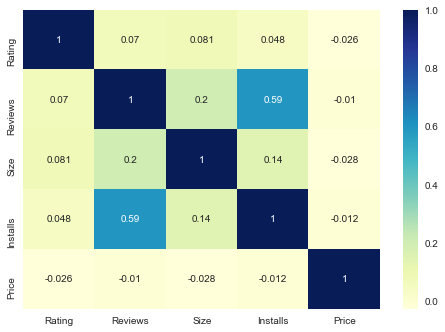

In [ ]:
sns.heatmap(train_dat.drop(['Type'], axis=1).corr(),cmap='YlGnBu', annot=True) # 연속형 변수 중 더미 변수인 Type을 제외하고 corr 확인
plt.show()

train data에서 target 변수인 `Rating`과 상관관계가 높은 순서대로 독립변수들을 나열해보면,  
`Size` - `Reviews` - `Installs` -  `Price` 이다.  
  
또한 `Installs`와 `Reviews` 간 상관관계가 크다.

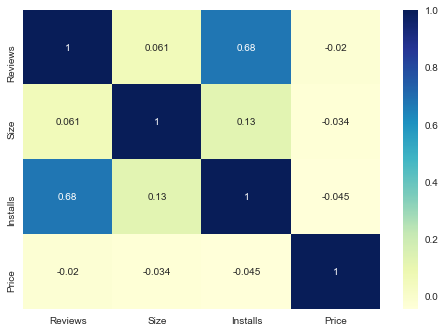

In [ ]:
sns.heatmap(test_dat.drop(['Type'], axis=1).corr(),cmap='YlGnBu', annot=True)
plt.show()

`Reviews`와 `Installs` 간 상관관계가 크다.

### 이상치 처리

#### Train Data

IQR 을 이용해서 각 변수별 이상치를 확인해봤다.

In [ ]:
def find_outlier(df,features):
    q1 = np.percentile(df[features], 25)
    q3 = np.percentile(df[features], 75)
    iqr = q3 - q1
    outlier_step = 1.5 * iqr
        
    outlier_list_col = df[(df[features] < q1 - outlier_step) | (df[features] > q3 + outlier_step)].index 
    return len(outlier_list_col)

# outlier의 개수를 확인하는 함수

In [ ]:
print(find_outlier(train_dat, 'Reviews'))
print(find_outlier(train_dat, 'Installs'))
print(find_outlier(train_dat, 'Price'))

924
1162
441


train_dat의 개수가 5616개임을 고려했을 때 이상치가 너무 많으므로 pairplot을 통해 시각적으로 이상치라고 여겨지는 데이터들만 제거하도록 한다.

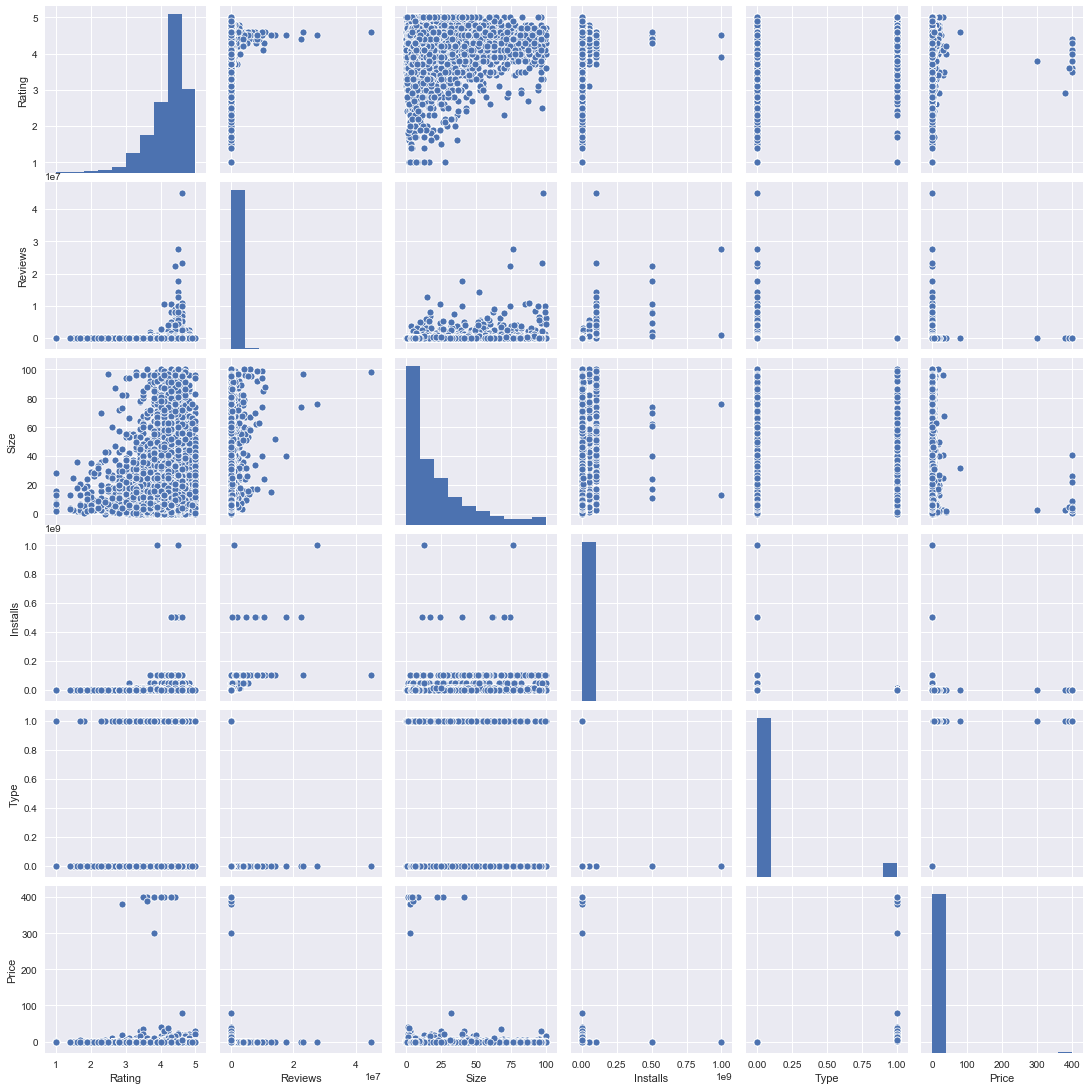

In [ ]:
sns.pairplot(train_dat)

pairplot을 통해 발견한 이상치가 있는 것으로 의심되는 변수는 `Reviews`, `Installs`, `Price` 이다.  
어떤 obs인지 확인해보면 다음과 같다.

In [ ]:
train_dat[train_dat['Reviews']>4e7] # 1개

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Last_Updated
975,Clash of Clans,GAME,4.6,44891723,98.0,100000000.0,0,0.0,Everyone 10+,2018-07-15


In [ ]:
train_dat[train_dat['Installs']>0.9e9] # 2개

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Last_Updated
960,Subway Surfers,GAME,4.5,27722264,76.0,1.000000e+09,0,0.0,Everyone 10+,2018-07-12
2115,Google News,NEWS_AND_MAGAZINES,3.9,877635,13.0,1.000000e+09,0,0.0,Teen,2018-08-01


In [ ]:
train_dat['Price'].sort_values().tail(20)

1734     29.99
1342     33.99
3240     37.99
1424     39.99
1303     79.99
3235    299.99
3237    379.99
3246    389.99
3244    399.99
3242    399.99
3249    399.99
3253    399.99
3232    399.99
3239    399.99
3234    399.99
3236    399.99
2506    399.99
2392    399.99
3238    399.99
2510    400.00
Name: Price, dtype: float64

In [ ]:
train_dat[train_dat['Price']>200] # 15개

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Last_Updated
2392,most expensive app (H),FAMILY,4.3,6,1.500,100.0,1,399.99,Everyone,2018-07-16
2506,💎 I'm rich,LIFESTYLE,3.8,718,26.000,10000.0,1,399.99,Everyone,2018-03-11
2510,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300,10000.0,1,400.00,Everyone,2018-05-03
3232,I am rich,LIFESTYLE,3.8,3547,1.800,100000.0,1,399.99,Everyone,2018-01-12
3234,I am Rich Plus,FAMILY,4.0,856,8.700,10000.0,1,399.99,Everyone,2018-05-19
3235,I am rich VIP,LIFESTYLE,3.8,411,2.600,10000.0,1,299.99,Everyone,2018-07-21
3236,I Am Rich Premium,FINANCE,4.1,1867,4.700,50000.0,1,399.99,Everyone,2017-11-12
3237,I am extremely Rich,LIFESTYLE,2.9,41,2.900,1000.0,1,379.99,Everyone,2018-07-01
3238,I am Rich!,FINANCE,3.8,93,22.000,1000.0,1,399.99,Everyone,2017-12-11
3239,I am rich(premium),FINANCE,3.5,472,0.965,5000.0,1,399.99,Everyone,2017-05-01


In [ ]:
train_dat['Type'].value_counts() # 유료인 obs 441개 중에서 이상치 15개를 제거하는 것은 심각한 데이터 손실을 불러올 것 같진 않다.

0    5175
1     441
Name: Type, dtype: int64

In [ ]:
train_dat = train_dat[train_dat['Reviews']<4e7]
train_dat = train_dat[train_dat['Installs']<0.9e9]
train_dat = train_dat[train_dat['Price']<200]

위에서 확인한 이상치들을 모두 제거하였다.

#### Test Data

In [ ]:
test_dat.shape #이상치 제거 전 test data shape

(1404, 9)

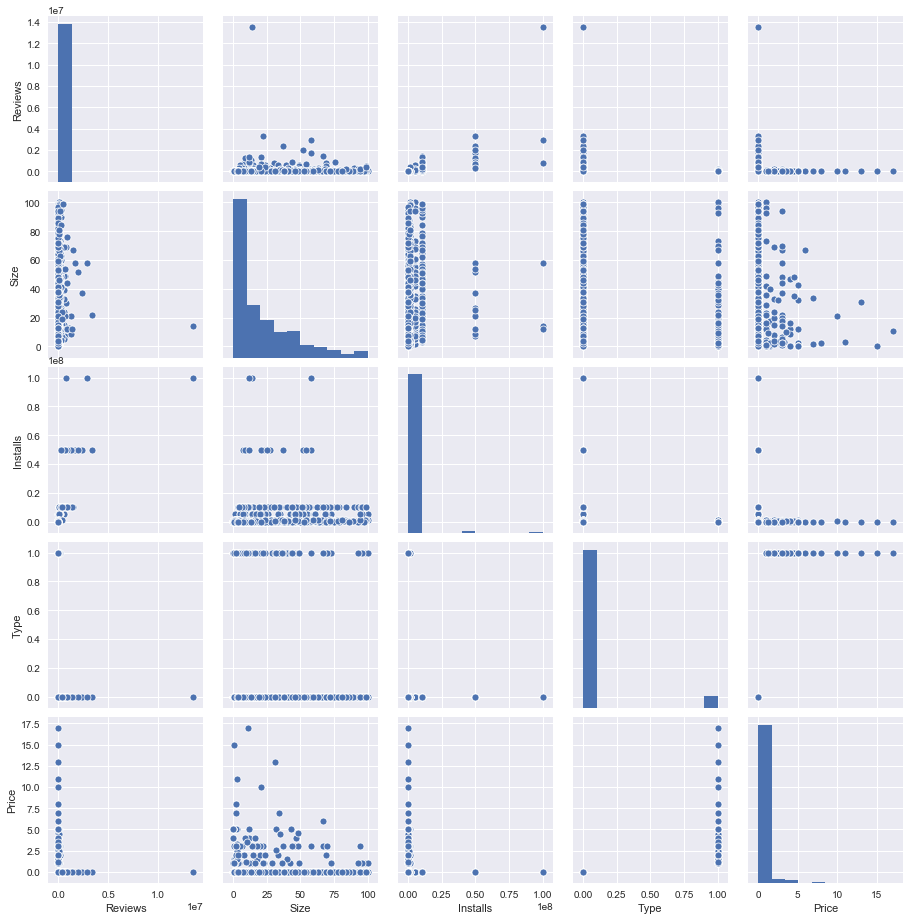

In [ ]:
sns.pairplot(test_dat)

train data와 같은 기준으로 이상치를 제거한다.

In [ ]:
test_dat = test_dat[test_dat['Reviews']<4e7]
test_dat = test_dat[test_dat['Installs']<0.9e9]
test_dat = test_dat[test_dat['Price']<200]

In [ ]:
train_dat.reset_index(drop=True, inplace=True)
test_dat.reset_index(drop=True, inplace=True)

In [ ]:
print(train_dat.shape)
print(test_dat.shape) # 이상치 제거 전후가 다르지 않다. -> 이상치 없음

(5598, 10)
(1404, 9)


### Feature Engineering

1. 현재 날짜(2020-08-14) 에서 `Last_Updated`를 뺀 변수 `Update_Term` 변수를 생성한다. (값이 작을수록 최신 버전인 것)
2. 평가 참여율을 나타내는 `Review_ratio`를 생성한다. (= `Reviews` / `Installs`)
3. `Category` 범주형 변수의 unique 수는 33개로 너무 많다. unique수를 간단히 만들고 One-Hot Encoding.
4. `Content_Rating` 범주형 변수를 One-Hot Encoding.
5. `Type` 더미변수를 One-Hot Encoding.

In [ ]:
train_dat.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Last_Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,0,0.0,Everyone,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,0,0.0,Everyone,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,0,0.0,Everyone,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,0,0.0,Teen,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,0,0.0,Everyone,2018-06-20


In [ ]:
test_dat.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content_Rating,Last_Updated
0,Dr.Android Repair Master 2017,PRODUCTIVITY,1205,4.3,100000.0,0,0.00,Everyone,2018-06-10
1,DR CONTROL,FAMILY,267,1.5,10000.0,0,0.00,Everyone,2017-03-08
2,Dr Driving Racer,GAME,183,68.0,10000.0,0,0.00,Everyone,2018-06-14
3,Dr. McDougall Mobile Cookbook,HEALTH_AND_FITNESS,76,1.2,1000.0,1,4.99,Everyone,2015-01-26
4,Dr. Seuss's ABC,FAMILY,429,12.0,10000.0,1,3.99,Everyone,2018-02-26


#### 1. `Update_Term` : 값이 작을수록 최신 버전임을 나타내는 Feature

In [ ]:
import datetime
from datetime import date

In [ ]:
# train_data에 대해 변수 생성

dt_now = date.today()
updated_days = [0 for i in range(len(train_dat['Last_Updated']))]

for i in range(len(train_dat['Last_Updated'])):
    datt = train_dat.iloc[i, train_dat.columns.get_loc('Last_Updated')]
    dt_updated = datetime.datetime.strptime(datt,"%Y-%m-%d").date()
    dt_term = dt_now - dt_updated
    updated_days[i] = int(dt_term.days)
    
train_dat['Update_Term'] = updated_days

In [ ]:
# test_data에 대해 변수 생성

dt_now = date.today()
updated_days = [0 for i in range(len(test_dat['Last_Updated']))]

for i in range(len(test_dat['Last_Updated'])):
    datt = test_dat.iloc[i, test_dat.columns.get_loc('Last_Updated')]
    dt_updated = datetime.datetime.strptime(datt,"%Y-%m-%d").date()
    dt_term = dt_now - dt_updated
    updated_days[i] = int(dt_term.days)
    
test_dat['Update_Term'] = updated_days

#### 2. `Review_ratio` : 값이 클수록 설치한 사람 중 많은 사람이 리뷰를 작성한 것

In [ ]:
train_dat['Review_ratio'] = train_dat['Reviews'] / train_dat['Installs']
test_dat['Review_ratio'] = test_dat['Reviews'] / test_dat['Installs']

In [ ]:
train_dat.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Last_Updated,Update_Term,Review_ratio
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,0,0.0,Everyone,2018-01-07,954,0.015900
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,0,0.0,Everyone,2018-01-15,946,0.001934
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,0,0.0,Everyone,2018-08-01,748,0.017502
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,0,0.0,Teen,2018-06-08,802,0.004313
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,0,0.0,Everyone,2018-06-20,790,0.009670


In [ ]:
test_dat.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content_Rating,Last_Updated,Update_Term,Review_ratio
0,Dr.Android Repair Master 2017,PRODUCTIVITY,1205,4.3,100000.0,0,0.00,Everyone,2018-06-10,800,0.01205
1,DR CONTROL,FAMILY,267,1.5,10000.0,0,0.00,Everyone,2017-03-08,1259,0.02670
2,Dr Driving Racer,GAME,183,68.0,10000.0,0,0.00,Everyone,2018-06-14,796,0.01830
3,Dr. McDougall Mobile Cookbook,HEALTH_AND_FITNESS,76,1.2,1000.0,1,4.99,Everyone,2015-01-26,2031,0.07600
4,Dr. Seuss's ABC,FAMILY,429,12.0,10000.0,1,3.99,Everyone,2018-02-26,904,0.04290


### Scaling by Robust Method
  
Classification Model 의 경우 변수의 scale을 맞춰주는 것이 중요하기 때문에 numeric 변수에 대해서 모두 scaling을 진행해준다.  
이상치의 영향을 작게 해주는 RobustScaler를 사용한다.

In [ ]:
train_num = train_dat.drop(['App', 'Category', 'Rating', 'Type', 'Content_Rating', 'Last_Updated'], axis=1)
test_num = test_dat.drop(['App', 'Category', 'Type', 'Content_Rating', 'Last_Updated'], axis=1)

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
train_scaled = scaler.fit_transform(train_num)
test_scaled = scaler.transform(test_num)

In [ ]:
train_scaled = pd.DataFrame(train_scaled, columns = train_num.columns)
test_scaled = pd.DataFrame(test_scaled, columns = test_num.columns)

#### 3. `Category` One-Hot Encoding  
* 참고로 최종 모델에는 이 변수를 사용하지 않았습니다.

In [ ]:
train_dat['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

`Category`의 범주형 변수 값이 너무 많기 때문에 비슷한 종류의 값 끼리 묶어주었다.  
  
Final Category | Explanation
:-: | :-
travel | TRAVEL_AND_LOCAL, MAPS_AND_NAVIGATION
family | FAMILY, PARENTING, HOUSE_AND_HOME
communication | COMMUNICATION, SOCIAL, NEWS_AND_MAGAZINES
entertainment | COMICS, ENTERTAINMENT, VIDEO_PLAYERS, GAME, EVENTS
health | MEDICAL, HEALTH_AND_FITNESS, SPORTS
tools | TOOLS, PRODUCTIVITY, LIBRARIES_AND_DEMO, PERSONALIZATION
daily_life | AUTO_AND_VEHICLES, LIFESTYLE, FOOD_AND_DRINK, DATING, SHOPPING, WEATHER
business | BUSINESS, FINANCE
education | BOOKS_AND_REFERENCE, EDUCATION
art | ART_AND_DESIGN, BEAUTY, PHOTOGRAPHY

In [ ]:
value_dict = {'TRAVEL_AND_LOCAL' : 'travel', 'MAPS_AND_NAVIGATION' : 'travel', 'FAMILY' : 'family', 'PARENTING' : 'family', 
              'HOUSE_AND_HOME' : 'family', 'COMMUNICATION' : 'communication', 'SOCIAL' : 'communication', 
              'NEWS_AND_MAGAZINES': 'communication', 'COMICS' : 'entertainment', 'ENTERTAINMENT': 'entertainment', 
              'VIDEO_PLAYERS': 'entertainment', 'GAME': 'entertainment', 'EVENTS': 'entertainment', 'MEDICAL' : 'health', 
              'HEALTH_AND_FITNESS': 'health', 'SPORTS': 'health','TOOLS' : 'tools', 'PRODUCTIVITY': 'tools', 
              'LIBRARIES_AND_DEMO': 'tools', 'PERSONALIZATION': 'tools', 'AUTO_AND_VEHICLES' : 'daily_life', 
              'LIFESTYLE': 'daily_life', 'FOOD_AND_DRINK': 'daily_life', 'DATING': 'daily_life', 'SHOPPING': 'daily_life',
              'WEATHER': 'daily_life', 'BUSINESS' : 'business', 'FINANCE': 'business', 'BOOKS_AND_REFERENCE' : 'education',
              'EDUCATION' : 'education', 'ART_AND_DESIGN' : 'art', 'BEAUTY': 'art', 'PHOTOGRAPHY': 'art'}

In [ ]:
train_dat['Category'] = train_dat['Category'].map(value_dict)
test_dat['Category'] = test_dat['Category'].map(value_dict)

In [ ]:
train_dat['Category'].unique()

array(['art', 'daily_life', 'education', 'business', 'entertainment',
       'communication', 'health', 'family', 'tools', 'travel'],
      dtype=object)

In [ ]:
test_dat['Category'].unique()

array(['tools', 'family', 'entertainment', 'health', 'education',
       'daily_life', 'art', 'travel', 'business', 'communication'],
      dtype=object)

새로운 `Category` 변수를 더미변수화 해준다.

In [ ]:
dum_cate_train = pd.DataFrame(pd.get_dummies(train_dat['Category'], prefix='Cate'))
dum_cate_test = pd.DataFrame(pd.get_dummies(test_dat['Category'], prefix='Cate'))

In [ ]:
dum_cate_train.head()

,Cate_art,Cate_business,Cate_communication,Cate_daily_life,Cate_education,Cate_entertainment,Cate_family,Cate_health,Cate_tools,Cate_travel
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [ ]:
print(dum_cate_train.shape)
print(dum_cate_test.shape) # 열의 개수가 같으므로 추후 보정작업은 필요없을 듯 하다.

(5598, 10)
(1404, 10)


#### 4. `Content_Rating` One-Hot Encoding

In [ ]:
dum_con_train = pd.DataFrame(pd.get_dummies(train_dat['Content_Rating'], prefix='Rate'))
dum_con_test = pd.DataFrame(pd.get_dummies(test_dat['Content_Rating'], prefix='Rate'))

In [ ]:
dum_con_train.head()

,Rate_Adults only 18+,Rate_Everyone,Rate_Everyone 10+,Rate_Mature 17+,Rate_Teen,Rate_Unrated
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,0,0,0,1,0
4,0,1,0,0,0,0


In [ ]:
dum_con_test.head()

,Rate_Everyone,Rate_Everyone 10+,Rate_Mature 17+,Rate_Teen
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [ ]:
print(dum_con_train.shape)
print(dum_con_test.shape) # 열의 개수가 다르므로 추후 보정작업이 필요하다.

(5598, 6)
(1404, 4)


In [ ]:
for i in range(dum_con_test.shape[0]):
    dum_con_test['Rate_Adults only 18+'] = 0
    dum_con_test['Rate_Unrated'] = 0

In [ ]:
print(dum_con_train.shape)
print(dum_con_test.shape) # 보정 완료

(5598, 6)
(1404, 6)


5. `Type` One-Hot Encoding

In [ ]:
dum_type_train = pd.DataFrame(pd.get_dummies(train_dat['Type'], prefix='Free'))
dum_type_test = pd.DataFrame(pd.get_dummies(test_dat['Type'], prefix='Free'))

In [ ]:
print(dum_type_train.shape)
print(dum_type_test.shape)

(5598, 2)
(1404, 2)


#### 전체 데이터셋 합치기

In [ ]:
train_rest = pd.DataFrame(train_dat[['Rating', 'Type']])
test_rest = pd.DataFrame(test_dat['Type'])

In [ ]:
print(train_rest.shape)
print(test_rest.shape)

(5598, 2)
(1404, 1)


In [ ]:
train = pd.concat([train_rest, dum_type_train, train_scaled, dum_con_train], axis=1)
test = pd.concat([test_rest, dum_type_test, test_scaled, dum_con_test], axis=1)              

In [ ]:
train.head()

,Rating,Type,Free_0,Free_1,Reviews,Size,Installs,Price,Update_Term,Review_ratio,Rate_Adults only 18+,Rate_Everyone,Rate_Everyone 10+,Rate_Mature 17+,Rate_Teen,Rate_Unrated
0,4.1,0,1,0,-0.061015,0.240964,-0.090909,0.0,0.377193,-0.066642,0,1,0,0,0,0
1,3.9,0,1,0,-0.036463,0.040161,0.404040,0.0,0.353801,-0.511175,0,1,0,0,0,0
2,4.7,0,1,0,2.593224,-0.172691,4.949495,0.0,-0.225146,-0.015651,0,1,0,0,0,0
3,4.5,0,1,0,6.486691,0.481928,50.404040,0.0,-0.067251,-0.435456,0,0,0,0,1,0
4,4.3,0,1,0,-0.036463,-0.409639,0.000000,0.0,-0.102339,-0.264941,0,1,0,0,0,0


In [ ]:
test.head()

,Type,Free_0,Free_1,Reviews,Size,Installs,Price,Update_Term,Review_ratio,Rate_Everyone,Rate_Everyone 10+,Rate_Mature 17+,Rate_Teen,Rate_Adults only 18+,Rate_Unrated
0,0,1,0,-0.029231,-0.349398,0.000000,0.00,-0.073099,-0.189186,1,0,0,0,0,0
1,0,1,0,-0.057733,-0.461847,-0.090909,0.00,1.269006,0.277119,1,0,0,0,0,0
2,0,1,0,-0.060286,2.208835,-0.090909,0.00,-0.084795,0.009749,1,0,0,0,0,0
3,1,0,1,-0.063537,-0.473896,-0.100000,4.99,3.526316,1.846323,1,0,0,0,0,0
4,1,0,1,-0.052811,-0.040161,-0.090909,3.99,0.230994,0.792760,1,0,0,0,0,0


In [ ]:
print(train.shape)
print(test.shape)

(5598, 16)
(1404, 15)


Variable | Explanation | Type | Unique | Remark
:-: | :- | :-: | :-: | :-
App	| 어플명 | object | 
Category | 카테고리 | object | 33 | 항목 합친 후 One-Hot Encoding.
Rating	| 평점 | num | | **TARGET**
Reviews	| 리뷰 개수	| num | | 
Size | 어플 크기 | num | | 
Installs | 다운로드 횟수 | num | | 
Type | 무료/유료 여부 | num | | One-Hot Encoding.
Price | 가격 | num | | 	
Content_Rating | 관람가 | object | 4 | One-Hot Encoding.
Genres | 세부장르 | object | | 
Last_Updated | 마지막 업데이트 | num | | 
Update_Term | 오늘 날짜 - `Last_Updated`, 값이 작을수록 최신 버전임을 나타내는 Feature | num | | New Feature
Review_ratio | 값이 클수록 설치한 사람 중 많은 사람이 리뷰를 작성한 것 | num |  | One-Hot Encoding.

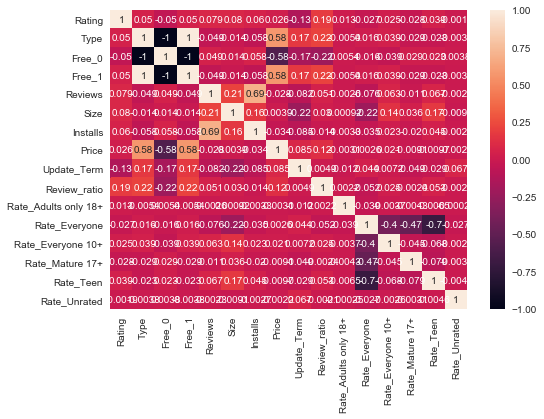

In [ ]:
sns.heatmap(train.corr(), annot=True)

### 결측치 처리

In [ ]:
train.isnull().sum()

Rating                  0
Type                    0
Free_0                  0
Free_1                  0
Reviews                 0
Size                    0
Installs                0
Price                   0
Update_Term             0
Review_ratio            0
Rate_Adults only 18+    0
Rate_Everyone           0
Rate_Everyone 10+       0
Rate_Mature 17+         0
Rate_Teen               0
Rate_Unrated            0
dtype: int64

In [ ]:
test.isnull().sum()

Type                    0
Free_0                  0
Free_1                  0
Reviews                 0
Size                    0
Installs                0
Price                   0
Update_Term             0
Review_ratio            0
Rate_Everyone           0
Rate_Everyone 10+       0
Rate_Mature 17+         0
Rate_Teen               0
Rate_Adults only 18+    0
Rate_Unrated            0
dtype: int64

결측치가 존재하지 않는다.

## Modeling

In [ ]:
# sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

### X, y 분리

In [ ]:
# target 분리, data split
y = train['Rating']
X = train.drop(['Rating'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state=318)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Type                  1404 non-null   int64  
 1   Free_0                1404 non-null   uint8  
 2   Free_1                1404 non-null   uint8  
 3   Reviews               1404 non-null   float64
 4   Size                  1404 non-null   float64
 5   Installs              1404 non-null   float64
 6   Price                 1404 non-null   float64
 7   Update_Term           1404 non-null   float64
 8   Review_ratio          1404 non-null   float64
 9   Rate_Everyone         1404 non-null   uint8  
 10  Rate_Everyone 10+     1404 non-null   uint8  
 11  Rate_Mature 17+       1404 non-null   uint8  
 12  Rate_Teen             1404 non-null   uint8  
 13  Rate_Adults only 18+  1404 non-null   int64  
 14  Rate_Unrated          1404 non-null   int64  
dtypes: float64(6), int64(

#### Validation Function

In [ ]:
n_folds = 5
def rmse_cv(model):
  kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
  rmse = np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring='neg_mean_squared_error', cv=kf))
  return (rmse)

In [ ]:
def rmse(y,y_pred):
  return np.sqrt(mean_squared_error(y,y_pred))

### Base Models  
  
Scaler : RobustScaler (이상치의 영향을 줄여주는 Scaler) 를 이미 사용함.

#### Linear Regression 

In [ ]:
lr = LinearRegression()

#### Ridge Regression

In [ ]:
rid = Ridge()

#### Lasso Regression

In [ ]:
las = Lasso()

#### Decision Tree

In [ ]:
dt = DecisionTreeRegressor(max_depth=10)

#### KNN

In [ ]:
knn = KNeighborsRegressor(n_neighbors = 3)

#### SVM (Support Vector Machine)

In [ ]:
svm = SVR()

#### Random Forest  
Bagging model 중 하나. 무작위성을 더 강조. bagging보다 성능이 좋고 input outlier에 강하다.

In [ ]:
rf = RandomForestRegressor()

#### GBM  
Boosing Model 중 하나. Gradient Descent Boosting

In [ ]:
gbm = make_pipeline(GradientBoostingRegressor(n_estimators = 3000, learning_rate=0.05,
                                              max_depth=4, max_features='sqrt',
                                              min_samples_leaf=15, min_samples_split=10,
                                              loss = 'huber', random_state=1004))

#### XGBoost  
  
Regressor를 사용하기 때문에 scaling한 데이터를 사용해도 상관없다.

In [ ]:
xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

#### LightGBM  
  
  
Regressor를 사용하기 때문에 scaling한 데이터를 사용해도 상관없다.

In [ ]:
lgb = lgb.LGBMRegressor(objective='regression', num_leaves=31, learning_rate=0.05, n_estimators=20) 

### Base Model Scores

In [ ]:
score = rmse_cv(lr)
print("\nLinear Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Linear Regression score: 0.5305 (0.0241)



In [ ]:
score = rmse_cv(rid)
print("\nRidge Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Ridge Regression score: 0.5305 (0.0241)



In [ ]:
score = rmse_cv(las)
print("\nLasso Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso Regression score: 0.5413 (0.0139)



In [ ]:
score = rmse_cv(dt)
print("\nDecision tree score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Decision tree score: 0.5932 (0.0289)



In [ ]:
score = rmse_cv(knn)     
print("\nKNN score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


KNN score: 0.5648 (0.0163)



In [ ]:
score = rmse_cv(svm)     
print("\nSVM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


SVM score: 0.5214 (0.0168)



In [ ]:
score = rmse_cv(rf)     
print("\nRandom Forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Random Forest score: 0.5308 (0.0153)



In [ ]:
score = rmse_cv(gbm)     
print("\nGBM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


GBM score: 0.5317 (0.0110)



In [ ]:
score = rmse_cv(xgb)     
print("\nXGBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[01:50:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:50:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:50:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

In [ ]:
score = rmse_cv(lgb)     
print("\nLGBM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


LGBM score: 0.5116 (0.0143)



모델 성능은 LightGBM - SVM - (Linear Regreesion, Ridge) - RF - GBM - XGBoost - LASSO - KNN - DT 순으로 좋다.

### Base Model Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
import lightgbm as lgb
lgb2 = lgb.LGBMRegressor(objective='regression') 

param_grid_lgb = {
    'num_leaves': [35, 50, 65],
    'n_estimators': [20, 30, 40],
    'learning_rate' : [0.01, 0.05, 0.1]
}

grid_lgb = GridSearchCV(lgb2, param_grid_lgb, cv=5, scoring='neg_mean_squared_error')
grid_lgb.fit(X_train.values, y_train)

print(grid_lgb.best_score_)
print(grid_lgb.best_params_)

-0.2600535371180146
{'learning_rate': 0.1, 'n_estimators': 20, 'num_leaves': 35}


In [ ]:
lgb_opt = lgb.LGBMRegressor(objective='regression', num_leaves=35, n_estimators=20, learning_rate=0.1)

In [ ]:
score = rmse_cv(lgb_opt)     
print("\nOptimal LGBM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Optimal LGBM score: 0.5098 (0.0134)



In [ ]:
svm2 = SVR()

param_grid_svm = [
    {
        'kernel': ['linear'],
        'gamma' : ['scale', 'auto']
    },
    {
        'kernel': ['rbf', 'sigmoid'],
        'gamma': ['scale', 'auto'],
        'C' : list(range(1,11))
    }
]

grid_svm = GridSearchCV(svm2, param_grid_svm, cv=5, scoring='neg_mean_squared_error')
grid_svm.fit(X_train.values, y_train)

print(grid_svm.best_score_)
print(grid_svm.best_params_)

-0.2660318161263552
{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}


In [ ]:
svm_opt = SVR(C=1, gamma='auto', kernel='rbf')

In [ ]:
score = rmse_cv(svm_opt)     
print("\nOptimal SVM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Optimal SVM score: 0.5156 (0.0144)



In [ ]:
rf2 = RandomForestRegressor()

param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_rf = GridSearchCV(rf2, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_rf.fit(X_train.values, y_train)

print(grid_rf.best_score_)
print(grid_rf.best_params_)

-0.2635230969017173
{'max_features': 'sqrt', 'n_estimators': 100}


In [ ]:
rf_opt = RandomForestRegressor(n_estimators=100 , max_features='sqrt')

In [ ]:
score = rmse_cv(rf_opt)     
print("\nOptimal RandomForest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Optimal RandomForest score: 0.5151 (0.0141)



In [ ]:
rid2 = Ridge()

param_grid_rid = {
    'alpha': list(range(1,21))
}

grid_rid = GridSearchCV(rid2, param_grid_rid, cv=5, scoring='neg_mean_squared_error')
grid_rid.fit(X_train.values, y_train)

print(grid_rid.best_score_)
print(grid_rid.best_params_)

-0.2819813958392104
{'alpha': 20}


In [ ]:
rid_opt = Ridge(alpha=10)

In [ ]:
score = rmse_cv(rid_opt)     
print("\nOptimal Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Optimal Ridge score: 0.5305 (0.0241)




gbm2 = GradientBoostingRegressor(max_depth=4,min_samples_leaf=15, min_samples_split=10,random_state=1004, verbose=3)

param_grid_gbm = {
    'n_estimators': [3000, 4000, 5000],
    'learning_rate' : [0.01, 0.05, 0.1],
    'loss' : ['huber', 'ls'],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_gbm = GridSearchCV(gbm2, param_grid_gbm, cv=5, scoring='neg_mean_squared_error')
grid_gbm.fit(X_train.values, y_train)

print(grid_gbm.best_score_)
print(grid_gbm.best_params_)
```

In [ ]:
print(grid_gbm.best_score_)
print(grid_gbm.best_params_)

-0.25975741336275515
{'learning_rate': 0.01, 'loss': 'ls', 'max_features': 'sqrt', 'n_estimators': 3000}


In [ ]:
gbm_opt = GradientBoostingRegressor(max_depth=4,min_samples_leaf=15, min_samples_split=10,random_state=1004, verbose=3, 
                                 learning_rate=0.01, loss='ls', max_features='sqrt', n_estimators=3000)

In [ ]:
score = rmse_cv(gbm_opt)     
print("\nGradientBoostingRegressor Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

      Iter       Train Loss   Remaining Time 
         1           0.2952           38.91s
         2           0.2945           35.89s
         3           0.2938           36.87s
         4           0.2934           38.10s
         5           0.2928           38.83s
         6           0.2921           39.81s
         7           0.2914           39.23s
         8           0.2908           38.79s
         9           0.2904           38.78s
        10           0.2899           38.77s
        11           0.2893           39.02s
        12           0.2887           39.49s
        13           0.2882           39.42s
        14           0.2878           39.35s
        15           0.2873           40.29s
        16           0.2869           41.66s
        17           0.2865           41.30s
        18           0.2860           41.64s
        19           0.2853           42.09s
        20           0.2849           42.05s
        21           0.2845           41.74s
        2

       199           0.2464           35.40s
       200           0.2463           35.37s
       201           0.2462           35.30s
       202           0.2461           35.23s
       203           0.2461           35.12s
       204           0.2460           35.05s
       205           0.2459           35.00s
       206           0.2458           34.91s
       207           0.2458           34.80s
       208           0.2457           34.75s
       209           0.2456           34.67s
       210           0.2455           34.60s
       211           0.2454           34.50s
       212           0.2454           34.43s
       213           0.2453           34.36s
       214           0.2452           34.29s
       215           0.2451           34.24s
       216           0.2450           34.18s
       217           0.2449           34.13s
       218           0.2448           34.08s
       219           0.2447           34.08s
       220           0.2447           34.01s
       221

       394           0.2347           26.62s
       395           0.2346           26.58s
       396           0.2345           26.55s
       397           0.2345           26.51s
       398           0.2345           26.48s
       399           0.2344           26.45s
       400           0.2343           26.43s
       401           0.2343           26.39s
       402           0.2342           26.37s
       403           0.2342           26.35s
       404           0.2342           26.34s
       405           0.2341           26.30s
       406           0.2341           26.27s
       407           0.2340           26.24s
       408           0.2340           26.19s
       409           0.2340           26.15s
       410           0.2339           26.11s
       411           0.2339           26.07s
       412           0.2339           26.02s
       413           0.2338           25.99s
       414           0.2338           25.96s
       415           0.2338           25.92s
       416

       584           0.2287           27.29s
       585           0.2287           27.28s
       586           0.2287           27.29s
       587           0.2286           27.28s
       588           0.2286           27.25s
       589           0.2285           27.26s
       590           0.2285           27.26s
       591           0.2285           27.25s
       592           0.2285           27.30s
       593           0.2284           27.31s
       594           0.2284           27.31s
       595           0.2284           27.36s
       596           0.2284           27.39s
       597           0.2284           27.41s
       598           0.2283           27.42s
       599           0.2283           27.41s
       600           0.2283           27.40s
       601           0.2283           27.38s
       602           0.2282           27.37s
       603           0.2282           27.37s
       604           0.2282           27.35s
       605           0.2281           27.33s
       606

       771           0.2242           23.96s
       772           0.2242           23.95s
       773           0.2241           23.93s
       774           0.2241           23.91s
       775           0.2241           23.88s
       776           0.2241           23.86s
       777           0.2240           23.84s
       778           0.2240           23.82s
       779           0.2240           23.79s
       780           0.2240           23.77s
       781           0.2239           23.75s
       782           0.2239           23.74s
       783           0.2239           23.72s
       784           0.2239           23.70s
       785           0.2238           23.68s
       786           0.2238           23.66s
       787           0.2238           23.64s
       788           0.2238           23.61s
       789           0.2238           23.60s
       790           0.2238           23.58s
       791           0.2237           23.57s
       792           0.2237           23.54s
       793

       963           0.2193           20.36s
       964           0.2193           20.34s
       965           0.2193           20.33s
       966           0.2192           20.31s
       967           0.2192           20.30s
       968           0.2192           20.28s
       969           0.2191           20.26s
       970           0.2191           20.25s
       971           0.2191           20.23s
       972           0.2191           20.21s
       973           0.2190           20.19s
       974           0.2190           20.18s
       975           0.2190           20.16s
       976           0.2190           20.14s
       977           0.2189           20.12s
       978           0.2189           20.10s
       979           0.2189           20.08s
       980           0.2189           20.07s
       981           0.2189           20.05s
       982           0.2189           20.04s
       983           0.2188           20.01s
       984           0.2188           20.00s
       985

      1146           0.2149           17.68s
      1147           0.2149           17.67s
      1148           0.2149           17.66s
      1149           0.2148           17.65s
      1150           0.2148           17.64s
      1151           0.2148           17.63s
      1152           0.2147           17.61s
      1153           0.2147           17.60s
      1154           0.2147           17.58s
      1155           0.2147           17.57s
      1156           0.2147           17.55s
      1157           0.2146           17.54s
      1158           0.2146           17.52s
      1159           0.2146           17.52s
      1160           0.2145           17.51s
      1161           0.2145           17.50s
      1162           0.2145           17.48s
      1163           0.2145           17.47s
      1164           0.2144           17.45s
      1165           0.2144           17.44s
      1166           0.2143           17.42s
      1167           0.2143           17.40s
      1168

      1347           0.2098           15.02s
      1348           0.2098           15.01s
      1349           0.2098           15.00s
      1350           0.2097           14.98s
      1351           0.2097           14.97s
      1352           0.2097           14.95s
      1353           0.2097           14.93s
      1354           0.2096           14.92s
      1355           0.2096           14.90s
      1356           0.2096           14.89s
      1357           0.2096           14.87s
      1358           0.2095           14.86s
      1359           0.2095           14.84s
      1360           0.2095           14.83s
      1361           0.2095           14.82s
      1362           0.2094           14.80s
      1363           0.2094           14.79s
      1364           0.2094           14.77s
      1365           0.2094           14.76s
      1366           0.2094           14.74s
      1367           0.2093           14.73s
      1368           0.2093           14.71s
      1369

      1542           0.2052           12.46s
      1543           0.2052           12.46s
      1544           0.2052           12.45s
      1545           0.2052           12.44s
      1546           0.2051           12.43s
      1547           0.2051           12.42s
      1548           0.2051           12.41s
      1549           0.2051           12.40s
      1550           0.2051           12.39s
      1551           0.2051           12.37s
      1552           0.2050           12.36s
      1553           0.2050           12.35s
      1554           0.2050           12.34s
      1555           0.2049           12.32s
      1556           0.2049           12.31s
      1557           0.2049           12.30s
      1558           0.2049           12.29s
      1559           0.2048           12.28s
      1560           0.2048           12.27s
      1561           0.2048           12.26s
      1562           0.2048           12.25s
      1563           0.2048           12.24s
      1564

      1760           0.2010            9.94s
      1761           0.2010            9.93s
      1762           0.2010            9.92s
      1763           0.2010            9.91s
      1764           0.2009            9.90s
      1765           0.2009            9.89s
      1766           0.2009            9.88s
      1767           0.2009            9.87s
      1768           0.2009            9.86s
      1769           0.2008            9.85s
      1770           0.2008            9.84s
      1771           0.2008            9.83s
      1772           0.2007            9.82s
      1773           0.2007            9.81s
      1774           0.2007            9.80s
      1775           0.2007            9.79s
      1776           0.2007            9.78s
      1777           0.2006            9.77s
      1778           0.2006            9.75s
      1779           0.2006            9.75s
      1780           0.2006            9.74s
      1781           0.2005            9.73s
      1782

      1963           0.1970            7.95s
      1964           0.1970            7.94s
      1965           0.1970            7.93s
      1966           0.1969            7.93s
      1967           0.1969            7.92s
      1968           0.1969            7.91s
      1969           0.1969            7.90s
      1970           0.1969            7.89s
      1971           0.1969            7.88s
      1972           0.1968            7.87s
      1973           0.1968            7.87s
      1974           0.1968            7.86s
      1975           0.1968            7.85s
      1976           0.1968            7.84s
      1977           0.1968            7.83s
      1978           0.1967            7.82s
      1979           0.1967            7.81s
      1980           0.1967            7.80s
      1981           0.1967            7.79s
      1982           0.1967            7.79s
      1983           0.1967            7.78s
      1984           0.1967            7.77s
      1985

      2159           0.1940            6.23s
      2160           0.1940            6.22s
      2161           0.1940            6.21s
      2162           0.1940            6.21s
      2163           0.1940            6.20s
      2164           0.1940            6.19s
      2165           0.1940            6.18s
      2166           0.1940            6.17s
      2167           0.1940            6.17s
      2168           0.1940            6.16s
      2169           0.1940            6.15s
      2170           0.1940            6.14s
      2171           0.1940            6.13s
      2172           0.1939            6.12s
      2173           0.1939            6.11s
      2174           0.1939            6.11s
      2175           0.1939            6.10s
      2176           0.1939            6.09s
      2177           0.1939            6.08s
      2178           0.1939            6.07s
      2179           0.1939            6.07s
      2180           0.1939            6.06s
      2181

      2371           0.1910            4.49s
      2372           0.1910            4.48s
      2373           0.1910            4.47s
      2374           0.1910            4.47s
      2375           0.1909            4.46s
      2376           0.1909            4.45s
      2377           0.1909            4.44s
      2378           0.1909            4.43s
      2379           0.1909            4.43s
      2380           0.1908            4.42s
      2381           0.1908            4.41s
      2382           0.1908            4.40s
      2383           0.1908            4.39s
      2384           0.1908            4.39s
      2385           0.1908            4.38s
      2386           0.1908            4.37s
      2387           0.1908            4.36s
      2388           0.1907            4.35s
      2389           0.1907            4.34s
      2390           0.1907            4.34s
      2391           0.1907            4.33s
      2392           0.1907            4.32s
      2393

      2564           0.1884            3.17s
      2565           0.1883            3.16s
      2566           0.1883            3.16s
      2567           0.1883            3.15s
      2568           0.1883            3.14s
      2569           0.1883            3.14s
      2570           0.1883            3.13s
      2571           0.1882            3.12s
      2572           0.1882            3.12s
      2573           0.1882            3.11s
      2574           0.1882            3.10s
      2575           0.1882            3.09s
      2576           0.1882            3.09s
      2577           0.1882            3.08s
      2578           0.1882            3.07s
      2579           0.1881            3.07s
      2580           0.1881            3.06s
      2581           0.1881            3.05s
      2582           0.1881            3.04s
      2583           0.1881            3.04s
      2584           0.1881            3.03s
      2585           0.1881            3.02s
      2586

      2761           0.1856            1.79s
      2762           0.1856            1.79s
      2763           0.1856            1.78s
      2764           0.1856            1.77s
      2765           0.1856            1.76s
      2766           0.1855            1.76s
      2767           0.1855            1.75s
      2768           0.1855            1.74s
      2769           0.1855            1.73s
      2770           0.1855            1.73s
      2771           0.1855            1.72s
      2772           0.1855            1.71s
      2773           0.1855            1.70s
      2774           0.1855            1.70s
      2775           0.1854            1.69s
      2776           0.1854            1.68s
      2777           0.1854            1.67s
      2778           0.1854            1.67s
      2779           0.1854            1.66s
      2780           0.1853            1.65s
      2781           0.1853            1.64s
      2782           0.1853            1.64s
      2783

      2946           0.1832            0.41s
      2947           0.1832            0.40s
      2948           0.1832            0.39s
      2949           0.1832            0.38s
      2950           0.1832            0.38s
      2951           0.1832            0.37s
      2952           0.1831            0.36s
      2953           0.1831            0.35s
      2954           0.1831            0.35s
      2955           0.1831            0.34s
      2956           0.1831            0.33s
      2957           0.1831            0.32s
      2958           0.1831            0.32s
      2959           0.1831            0.31s
      2960           0.1831            0.30s
      2961           0.1831            0.29s
      2962           0.1831            0.29s
      2963           0.1830            0.28s
      2964           0.1830            0.27s
      2965           0.1830            0.26s
      2966           0.1830            0.26s
      2967           0.1830            0.25s
      2968

       139           0.2443           31.04s
       140           0.2441           31.07s
       141           0.2440           31.06s
       142           0.2439           30.95s
       143           0.2438           30.92s
       144           0.2437           30.86s
       145           0.2435           30.83s
       146           0.2434           30.76s
       147           0.2433           30.78s
       148           0.2432           30.69s
       149           0.2431           30.65s
       150           0.2430           30.60s
       151           0.2429           30.58s
       152           0.2428           30.55s
       153           0.2427           30.44s
       154           0.2426           30.37s
       155           0.2425           30.30s
       156           0.2424           30.24s
       157           0.2422           30.25s
       158           0.2421           30.17s
       159           0.2420           30.15s
       160           0.2418           30.17s
       161

       334           0.2289           22.51s
       335           0.2289           22.48s
       336           0.2288           22.45s
       337           0.2288           22.42s
       338           0.2288           22.39s
       339           0.2288           22.36s
       340           0.2287           22.32s
       341           0.2286           22.27s
       342           0.2286           22.24s
       343           0.2286           22.20s
       344           0.2285           22.16s
       345           0.2285           22.14s
       346           0.2285           22.09s
       347           0.2285           22.05s
       348           0.2284           22.01s
       349           0.2284           21.97s
       350           0.2283           21.94s
       351           0.2283           21.90s
       352           0.2282           21.88s
       353           0.2282           21.84s
       354           0.2281           21.81s
       355           0.2281           21.78s
       356

       519           0.2222           17.96s
       520           0.2222           17.95s
       521           0.2221           17.94s
       522           0.2221           17.92s
       523           0.2221           17.90s
       524           0.2221           17.88s
       525           0.2221           17.86s
       526           0.2220           17.84s
       527           0.2220           17.83s
       528           0.2220           17.81s
       529           0.2220           17.78s
       530           0.2219           17.76s
       531           0.2219           17.75s
       532           0.2219           17.74s
       533           0.2218           17.74s
       534           0.2218           17.73s
       535           0.2218           17.73s
       536           0.2218           17.72s
       537           0.2217           17.72s
       538           0.2217           17.72s
       539           0.2216           17.71s
       540           0.2216           17.70s
       541

       707           0.2174           16.44s
       708           0.2174           16.43s
       709           0.2173           16.42s
       710           0.2173           16.40s
       711           0.2173           16.38s
       712           0.2173           16.37s
       713           0.2173           16.36s
       714           0.2173           16.34s
       715           0.2172           16.33s
       716           0.2172           16.31s
       717           0.2172           16.31s
       718           0.2172           16.30s
       719           0.2171           16.28s
       720           0.2171           16.28s
       721           0.2171           16.27s
       722           0.2170           16.26s
       723           0.2170           16.24s
       724           0.2170           16.22s
       725           0.2170           16.22s
       726           0.2170           16.21s
       727           0.2169           16.20s
       728           0.2169           16.18s
       729

       919           0.2130           14.46s
       920           0.2129           14.45s
       921           0.2129           14.44s
       922           0.2129           14.43s
       923           0.2129           14.42s
       924           0.2128           14.41s
       925           0.2128           14.40s
       926           0.2128           14.39s
       927           0.2128           14.38s
       928           0.2128           14.37s
       929           0.2128           14.36s
       930           0.2127           14.35s
       931           0.2127           14.34s
       932           0.2127           14.33s
       933           0.2127           14.32s
       934           0.2127           14.31s
       935           0.2127           14.31s
       936           0.2127           14.30s
       937           0.2126           14.29s
       938           0.2126           14.28s
       939           0.2126           14.27s
       940           0.2126           14.26s
       941

      1111           0.2091           12.44s
      1112           0.2091           12.44s
      1113           0.2091           12.43s
      1114           0.2090           12.43s
      1115           0.2090           12.41s
      1116           0.2090           12.41s
      1117           0.2090           12.40s
      1118           0.2089           12.39s
      1119           0.2089           12.38s
      1120           0.2089           12.37s
      1121           0.2089           12.36s
      1122           0.2089           12.35s
      1123           0.2088           12.35s
      1124           0.2088           12.33s
      1125           0.2088           12.32s
      1126           0.2088           12.31s
      1127           0.2088           12.30s
      1128           0.2087           12.29s
      1129           0.2087           12.28s
      1130           0.2087           12.27s
      1131           0.2086           12.26s
      1132           0.2086           12.25s
      1133

      1323           0.2048           10.46s
      1324           0.2048           10.45s
      1325           0.2047           10.44s
      1326           0.2047           10.44s
      1327           0.2047           10.43s
      1328           0.2047           10.41s
      1329           0.2047           10.40s
      1330           0.2047           10.39s
      1331           0.2047           10.38s
      1332           0.2047           10.38s
      1333           0.2046           10.37s
      1334           0.2046           10.36s
      1335           0.2046           10.35s
      1336           0.2046           10.34s
      1337           0.2045           10.33s
      1338           0.2045           10.32s
      1339           0.2045           10.31s
      1340           0.2045           10.30s
      1341           0.2045           10.29s
      1342           0.2045           10.28s
      1343           0.2044           10.27s
      1344           0.2044           10.26s
      1345

      1539           0.2009            8.73s
      1540           0.2009            8.72s
      1541           0.2009            8.71s
      1542           0.2009            8.70s
      1543           0.2008            8.70s
      1544           0.2008            8.69s
      1545           0.2008            8.68s
      1546           0.2008            8.67s
      1547           0.2007            8.67s
      1548           0.2007            8.66s
      1549           0.2007            8.65s
      1550           0.2007            8.64s
      1551           0.2007            8.63s
      1552           0.2007            8.62s
      1553           0.2007            8.62s
      1554           0.2006            8.61s
      1555           0.2006            8.60s
      1556           0.2006            8.60s
      1557           0.2005            8.59s
      1558           0.2005            8.58s
      1559           0.2005            8.58s
      1560           0.2005            8.57s
      1561

      1730           0.1979            7.44s
      1731           0.1978            7.44s
      1732           0.1978            7.43s
      1733           0.1978            7.42s
      1734           0.1977            7.42s
      1735           0.1977            7.42s
      1736           0.1977            7.41s
      1737           0.1977            7.41s
      1738           0.1977            7.40s
      1739           0.1977            7.39s
      1740           0.1977            7.39s
      1741           0.1977            7.38s
      1742           0.1977            7.37s
      1743           0.1976            7.37s
      1744           0.1976            7.36s
      1745           0.1976            7.35s
      1746           0.1976            7.34s
      1747           0.1976            7.34s
      1748           0.1976            7.34s
      1749           0.1976            7.33s
      1750           0.1976            7.32s
      1751           0.1976            7.32s
      1752

      1928           0.1950            6.16s
      1929           0.1950            6.15s
      1930           0.1950            6.14s
      1931           0.1950            6.14s
      1932           0.1949            6.13s
      1933           0.1949            6.12s
      1934           0.1949            6.12s
      1935           0.1949            6.11s
      1936           0.1949            6.10s
      1937           0.1948            6.10s
      1938           0.1948            6.09s
      1939           0.1948            6.08s
      1940           0.1948            6.07s
      1941           0.1948            6.07s
      1942           0.1948            6.06s
      1943           0.1948            6.05s
      1944           0.1947            6.05s
      1945           0.1947            6.04s
      1946           0.1947            6.03s
      1947           0.1947            6.03s
      1948           0.1947            6.02s
      1949           0.1947            6.01s
      1950

      2128           0.1920            4.84s
      2129           0.1920            4.84s
      2130           0.1920            4.83s
      2131           0.1920            4.83s
      2132           0.1920            4.82s
      2133           0.1920            4.81s
      2134           0.1920            4.81s
      2135           0.1919            4.80s
      2136           0.1919            4.79s
      2137           0.1919            4.79s
      2138           0.1919            4.78s
      2139           0.1919            4.78s
      2140           0.1919            4.77s
      2141           0.1919            4.76s
      2142           0.1919            4.76s
      2143           0.1919            4.75s
      2144           0.1918            4.74s
      2145           0.1918            4.74s
      2146           0.1918            4.73s
      2147           0.1918            4.73s
      2148           0.1917            4.72s
      2149           0.1917            4.71s
      2150

      2337           0.1893            3.57s
      2338           0.1893            3.56s
      2339           0.1893            3.55s
      2340           0.1893            3.55s
      2341           0.1893            3.54s
      2342           0.1893            3.54s
      2343           0.1893            3.53s
      2344           0.1893            3.53s
      2345           0.1893            3.52s
      2346           0.1893            3.51s
      2347           0.1892            3.51s
      2348           0.1892            3.50s
      2349           0.1892            3.50s
      2350           0.1892            3.49s
      2351           0.1892            3.48s
      2352           0.1892            3.48s
      2353           0.1892            3.47s
      2354           0.1892            3.47s
      2355           0.1892            3.46s
      2356           0.1892            3.46s
      2357           0.1891            3.45s
      2358           0.1891            3.44s
      2359

      2561           0.1864            2.28s
      2562           0.1864            2.28s
      2563           0.1864            2.27s
      2564           0.1863            2.27s
      2565           0.1863            2.26s
      2566           0.1863            2.26s
      2567           0.1863            2.25s
      2568           0.1863            2.24s
      2569           0.1863            2.24s
      2570           0.1863            2.23s
      2571           0.1863            2.23s
      2572           0.1863            2.22s
      2573           0.1863            2.22s
      2574           0.1862            2.21s
      2575           0.1862            2.21s
      2576           0.1862            2.20s
      2577           0.1862            2.19s
      2578           0.1862            2.19s
      2579           0.1862            2.18s
      2580           0.1862            2.18s
      2581           0.1862            2.17s
      2582           0.1861            2.17s
      2583

      2760           0.1839            1.38s
      2761           0.1839            1.37s
      2762           0.1839            1.37s
      2763           0.1839            1.36s
      2764           0.1838            1.35s
      2765           0.1838            1.35s
      2766           0.1838            1.34s
      2767           0.1838            1.34s
      2768           0.1838            1.33s
      2769           0.1838            1.33s
      2770           0.1838            1.32s
      2771           0.1838            1.32s
      2772           0.1838            1.31s
      2773           0.1837            1.31s
      2774           0.1837            1.30s
      2775           0.1837            1.30s
      2776           0.1837            1.29s
      2777           0.1837            1.29s
      2778           0.1837            1.28s
      2779           0.1837            1.28s
      2780           0.1837            1.27s
      2781           0.1837            1.26s
      2782

      2955           0.1816            0.27s
      2956           0.1815            0.26s
      2957           0.1815            0.26s
      2958           0.1815            0.25s
      2959           0.1815            0.24s
      2960           0.1815            0.24s
      2961           0.1815            0.23s
      2962           0.1814            0.23s
      2963           0.1814            0.22s
      2964           0.1814            0.21s
      2965           0.1814            0.21s
      2966           0.1814            0.20s
      2967           0.1814            0.20s
      2968           0.1814            0.19s
      2969           0.1814            0.18s
      2970           0.1814            0.18s
      2971           0.1814            0.17s
      2972           0.1814            0.17s
      2973           0.1813            0.16s
      2974           0.1813            0.16s
      2975           0.1813            0.15s
      2976           0.1813            0.14s
      2977

       153           0.2514           43.31s
       154           0.2512           43.18s
       155           0.2511           43.04s
       156           0.2509           42.93s
       157           0.2507           42.80s
       158           0.2506           42.68s
       159           0.2505           42.55s
       160           0.2503           42.47s
       161           0.2503           42.31s
       162           0.2501           42.19s
       163           0.2500           42.15s
       164           0.2498           42.10s
       165           0.2498           42.10s
       166           0.2497           42.02s
       167           0.2495           41.92s
       168           0.2494           41.78s
       169           0.2493           41.63s
       170           0.2492           41.52s
       171           0.2491           41.43s
       172           0.2490           41.36s
       173           0.2488           41.40s
       174           0.2487           41.29s
       175

       345           0.2361           29.48s
       346           0.2361           29.44s
       347           0.2361           29.39s
       348           0.2360           29.35s
       349           0.2360           29.30s
       350           0.2359           29.26s
       351           0.2358           29.23s
       352           0.2358           29.19s
       353           0.2357           29.14s
       354           0.2357           29.10s
       355           0.2357           29.08s
       356           0.2356           29.05s
       357           0.2356           29.00s
       358           0.2355           28.96s
       359           0.2355           28.91s
       360           0.2354           28.87s
       361           0.2354           28.84s
       362           0.2353           28.79s
       363           0.2353           28.76s
       364           0.2352           28.75s
       365           0.2352           28.73s
       366           0.2351           28.70s
       367

       550           0.2285           24.80s
       551           0.2285           24.80s
       552           0.2285           24.79s
       553           0.2285           24.78s
       554           0.2285           24.76s
       555           0.2284           24.75s
       556           0.2284           24.73s
       557           0.2284           24.71s
       558           0.2283           24.69s
       559           0.2283           24.68s
       560           0.2283           24.66s
       561           0.2283           24.63s
       562           0.2282           24.61s
       563           0.2282           24.59s
       564           0.2282           24.57s
       565           0.2282           24.54s
       566           0.2282           24.51s
       567           0.2281           24.48s
       568           0.2281           24.45s
       569           0.2281           24.42s
       570           0.2280           24.39s
       571           0.2280           24.35s
       572

       735           0.2241           23.71s
       736           0.2240           23.72s
       737           0.2240           23.72s
       738           0.2240           23.71s
       739           0.2240           23.70s
       740           0.2239           23.71s
       741           0.2239           23.71s
       742           0.2239           23.71s
       743           0.2239           23.70s
       744           0.2238           23.69s
       745           0.2238           23.68s
       746           0.2238           23.67s
       747           0.2237           23.67s
       748           0.2237           23.66s
       749           0.2237           23.65s
       750           0.2237           23.65s
       751           0.2237           23.65s
       752           0.2236           23.65s
       753           0.2236           23.64s
       754           0.2236           23.65s
       755           0.2236           23.64s
       756           0.2236           23.63s
       757

       923           0.2192           21.18s
       924           0.2192           21.20s
       925           0.2191           21.19s
       926           0.2191           21.18s
       927           0.2190           21.17s
       928           0.2190           21.15s
       929           0.2190           21.15s
       930           0.2190           21.13s
       931           0.2190           21.13s
       932           0.2189           21.13s
       933           0.2189           21.12s
       934           0.2189           21.12s
       935           0.2189           21.11s
       936           0.2188           21.10s
       937           0.2188           21.09s
       938           0.2188           21.09s
       939           0.2188           21.10s
       940           0.2188           21.09s
       941           0.2187           21.10s
       942           0.2186           21.09s
       943           0.2186           21.09s
       944           0.2185           21.08s
       945

      1119           0.2143           19.60s
      1120           0.2143           19.59s
      1121           0.2143           19.58s
      1122           0.2142           19.58s
      1123           0.2142           19.57s
      1124           0.2141           19.57s
      1125           0.2141           19.56s
      1126           0.2141           19.55s
      1127           0.2141           19.54s
      1128           0.2141           19.55s
      1129           0.2140           19.54s
      1130           0.2140           19.53s
      1131           0.2140           19.52s
      1132           0.2140           19.51s
      1133           0.2139           19.50s
      1134           0.2139           19.49s
      1135           0.2139           19.48s
      1136           0.2139           19.47s
      1137           0.2139           19.46s
      1138           0.2139           19.45s
      1139           0.2139           19.44s
      1140           0.2138           19.43s
      1141

      1305           0.2098           18.14s
      1306           0.2097           18.13s
      1307           0.2097           18.12s
      1308           0.2096           18.11s
      1309           0.2096           18.09s
      1310           0.2096           18.08s
      1311           0.2096           18.07s
      1312           0.2095           18.06s
      1313           0.2094           18.05s
      1314           0.2094           18.04s
      1315           0.2094           18.02s
      1316           0.2093           18.01s
      1317           0.2093           18.00s
      1318           0.2093           17.98s
      1319           0.2093           17.97s
      1320           0.2092           17.96s
      1321           0.2092           17.95s
      1322           0.2092           17.94s
      1323           0.2091           17.92s
      1324           0.2091           17.91s
      1325           0.2091           17.90s
      1326           0.2091           17.89s
      1327

      1503           0.2052           15.60s
      1504           0.2052           15.58s
      1505           0.2052           15.57s
      1506           0.2051           15.56s
      1507           0.2051           15.54s
      1508           0.2051           15.53s
      1509           0.2050           15.51s
      1510           0.2050           15.50s
      1511           0.2050           15.49s
      1512           0.2050           15.48s
      1513           0.2050           15.46s
      1514           0.2049           15.45s
      1515           0.2049           15.44s
      1516           0.2049           15.42s
      1517           0.2049           15.41s
      1518           0.2049           15.40s
      1519           0.2049           15.38s
      1520           0.2049           15.37s
      1521           0.2048           15.35s
      1522           0.2048           15.34s
      1523           0.2048           15.32s
      1524           0.2048           15.31s
      1525

      1700           0.2010           13.41s
      1701           0.2010           13.40s
      1702           0.2010           13.39s
      1703           0.2010           13.38s
      1704           0.2010           13.36s
      1705           0.2009           13.35s
      1706           0.2009           13.34s
      1707           0.2009           13.34s
      1708           0.2009           13.32s
      1709           0.2009           13.32s
      1710           0.2009           13.30s
      1711           0.2009           13.30s
      1712           0.2008           13.29s
      1713           0.2008           13.28s
      1714           0.2008           13.27s
      1715           0.2008           13.26s
      1716           0.2007           13.25s
      1717           0.2007           13.23s
      1718           0.2007           13.22s
      1719           0.2007           13.21s
      1720           0.2007           13.20s
      1721           0.2007           13.19s
      1722

      1889           0.1974           11.30s
      1890           0.1974           11.29s
      1891           0.1974           11.28s
      1892           0.1974           11.28s
      1893           0.1973           11.27s
      1894           0.1973           11.26s
      1895           0.1973           11.25s
      1896           0.1973           11.23s
      1897           0.1973           11.22s
      1898           0.1972           11.21s
      1899           0.1972           11.20s
      1900           0.1972           11.19s
      1901           0.1972           11.18s
      1902           0.1972           11.17s
      1903           0.1972           11.16s
      1904           0.1972           11.14s
      1905           0.1971           11.13s
      1906           0.1971           11.12s
      1907           0.1971           11.11s
      1908           0.1971           11.10s
      1909           0.1971           11.09s
      1910           0.1971           11.08s
      1911

      2072           0.1943            9.47s
      2073           0.1943            9.46s
      2074           0.1943            9.45s
      2075           0.1942            9.44s
      2076           0.1942            9.43s
      2077           0.1942            9.42s
      2078           0.1942            9.41s
      2079           0.1942            9.40s
      2080           0.1942            9.39s
      2081           0.1941            9.38s
      2082           0.1941            9.37s
      2083           0.1941            9.35s
      2084           0.1941            9.34s
      2085           0.1941            9.33s
      2086           0.1940            9.32s
      2087           0.1940            9.31s
      2088           0.1940            9.30s
      2089           0.1940            9.29s
      2090           0.1940            9.28s
      2091           0.1940            9.27s
      2092           0.1940            9.26s
      2093           0.1939            9.24s
      2094

      2259           0.1914            7.44s
      2260           0.1914            7.43s
      2261           0.1914            7.41s
      2262           0.1913            7.40s
      2263           0.1913            7.39s
      2264           0.1913            7.38s
      2265           0.1913            7.37s
      2266           0.1913            7.36s
      2267           0.1913            7.35s
      2268           0.1912            7.34s
      2269           0.1912            7.32s
      2270           0.1912            7.31s
      2271           0.1912            7.30s
      2272           0.1912            7.29s
      2273           0.1912            7.28s
      2274           0.1912            7.27s
      2275           0.1911            7.26s
      2276           0.1911            7.25s
      2277           0.1911            7.24s
      2278           0.1911            7.23s
      2279           0.1911            7.22s
      2280           0.1911            7.21s
      2281

      2450           0.1886            5.39s
      2451           0.1886            5.38s
      2452           0.1886            5.37s
      2453           0.1886            5.36s
      2454           0.1886            5.35s
      2455           0.1886            5.34s
      2456           0.1885            5.33s
      2457           0.1885            5.32s
      2458           0.1885            5.31s
      2459           0.1885            5.30s
      2460           0.1884            5.29s
      2461           0.1884            5.28s
      2462           0.1884            5.27s
      2463           0.1884            5.26s
      2464           0.1884            5.25s
      2465           0.1884            5.24s
      2466           0.1883            5.23s
      2467           0.1883            5.22s
      2468           0.1883            5.21s
      2469           0.1883            5.20s
      2470           0.1883            5.19s
      2471           0.1882            5.18s
      2472

      2638           0.1860            3.68s
      2639           0.1859            3.68s
      2640           0.1859            3.67s
      2641           0.1859            3.66s
      2642           0.1859            3.65s
      2643           0.1859            3.64s
      2644           0.1859            3.62s
      2645           0.1859            3.61s
      2646           0.1858            3.60s
      2647           0.1858            3.59s
      2648           0.1858            3.58s
      2649           0.1858            3.57s
      2650           0.1857            3.56s
      2651           0.1857            3.55s
      2652           0.1857            3.54s
      2653           0.1857            3.53s
      2654           0.1857            3.52s
      2655           0.1857            3.51s
      2656           0.1857            3.50s
      2657           0.1857            3.49s
      2658           0.1857            3.48s
      2659           0.1856            3.47s
      2660

      2842           0.1829            1.60s
      2843           0.1829            1.59s
      2844           0.1829            1.58s
      2845           0.1828            1.57s
      2846           0.1828            1.56s
      2847           0.1828            1.55s
      2848           0.1828            1.54s
      2849           0.1828            1.53s
      2850           0.1828            1.52s
      2851           0.1828            1.51s
      2852           0.1828            1.50s
      2853           0.1827            1.49s
      2854           0.1827            1.48s
      2855           0.1827            1.47s
      2856           0.1827            1.46s
      2857           0.1827            1.45s
      2858           0.1827            1.44s
      2859           0.1827            1.43s
      2860           0.1827            1.42s
      2861           0.1827            1.41s
      2862           0.1827            1.40s
      2863           0.1826            1.39s
      2864

        32           0.2783           33.95s
        33           0.2779           33.54s
        34           0.2773           33.50s
        35           0.2768           33.20s
        36           0.2765           32.76s
        37           0.2760           32.59s
        38           0.2757           32.26s
        39           0.2752           31.88s
        40           0.2747           31.59s
        41           0.2743           31.38s
        42           0.2739           31.26s
        43           0.2734           31.14s
        44           0.2730           30.75s
        45           0.2727           30.58s
        46           0.2723           30.36s
        47           0.2718           30.20s
        48           0.2716           29.99s
        49           0.2712           29.79s
        50           0.2709           29.54s
        51           0.2704           29.35s
        52           0.2701           29.12s
        53           0.2697           28.95s
        54

       221           0.2428           38.40s
       222           0.2426           38.40s
       223           0.2425           38.39s
       224           0.2425           38.33s
       225           0.2423           38.28s
       226           0.2422           38.23s
       227           0.2422           38.17s
       228           0.2421           38.11s
       229           0.2420           38.10s
       230           0.2419           38.04s
       231           0.2419           38.03s
       232           0.2418           38.02s
       233           0.2417           37.94s
       234           0.2416           37.87s
       235           0.2415           37.80s
       236           0.2414           37.73s
       237           0.2413           37.65s
       238           0.2412           37.57s
       239           0.2412           37.51s
       240           0.2411           37.40s
       241           0.2411           37.29s
       242           0.2410           37.20s
       243

       412           0.2325           29.89s
       413           0.2325           29.87s
       414           0.2325           29.86s
       415           0.2324           29.84s
       416           0.2324           29.79s
       417           0.2324           29.76s
       418           0.2323           29.72s
       419           0.2323           29.67s
       420           0.2322           29.63s
       421           0.2322           29.59s
       422           0.2321           29.56s
       423           0.2321           29.51s
       424           0.2321           29.47s
       425           0.2320           29.43s
       426           0.2320           29.37s
       427           0.2320           29.33s
       428           0.2320           29.28s
       429           0.2319           29.23s
       430           0.2319           29.18s
       431           0.2319           29.14s
       432           0.2319           29.09s
       433           0.2318           29.05s
       434

       607           0.2270           23.96s
       608           0.2269           23.95s
       609           0.2269           23.93s
       610           0.2269           23.91s
       611           0.2269           23.89s
       612           0.2269           23.87s
       613           0.2268           23.84s
       614           0.2268           23.82s
       615           0.2268           23.80s
       616           0.2268           23.77s
       617           0.2267           23.75s
       618           0.2267           23.73s
       619           0.2267           23.71s
       620           0.2266           23.70s
       621           0.2266           23.68s
       622           0.2266           23.67s
       623           0.2266           23.65s
       624           0.2266           23.62s
       625           0.2265           23.62s
       626           0.2265           23.60s
       627           0.2264           23.58s
       628           0.2264           23.56s
       629

       795           0.2220           22.64s
       796           0.2220           22.65s
       797           0.2219           22.68s
       798           0.2219           22.68s
       799           0.2219           22.67s
       800           0.2218           22.67s
       801           0.2218           22.66s
       802           0.2218           22.65s
       803           0.2217           22.65s
       804           0.2217           22.65s
       805           0.2217           22.65s
       806           0.2217           22.65s
       807           0.2216           22.66s
       808           0.2216           22.65s
       809           0.2216           22.65s
       810           0.2216           22.67s
       811           0.2215           22.68s
       812           0.2215           22.69s
       813           0.2215           22.69s
       814           0.2215           22.70s
       815           0.2214           22.70s
       816           0.2214           22.69s
       817

       982           0.2176           21.96s
       983           0.2176           21.95s
       984           0.2176           21.95s
       985           0.2175           21.93s
       986           0.2175           21.92s
       987           0.2174           21.90s
       988           0.2174           21.90s
       989           0.2174           21.89s
       990           0.2174           21.88s
       991           0.2173           21.86s
       992           0.2173           21.85s
       993           0.2173           21.83s
       994           0.2173           21.81s
       995           0.2173           21.80s
       996           0.2173           21.78s
       997           0.2173           21.77s
       998           0.2172           21.75s
       999           0.2172           21.73s
      1000           0.2171           21.73s
      1001           0.2171           21.71s
      1002           0.2171           21.69s
      1003           0.2171           21.68s
      1004

      1170           0.2132           18.78s
      1171           0.2131           18.78s
      1172           0.2131           18.77s
      1173           0.2131           18.75s
      1174           0.2131           18.74s
      1175           0.2131           18.72s
      1176           0.2131           18.71s
      1177           0.2130           18.70s
      1178           0.2130           18.68s
      1179           0.2130           18.67s
      1180           0.2130           18.67s
      1181           0.2129           18.65s
      1182           0.2129           18.64s
      1183           0.2129           18.62s
      1184           0.2128           18.61s
      1185           0.2128           18.59s
      1186           0.2128           18.58s
      1187           0.2128           18.57s
      1188           0.2127           18.56s
      1189           0.2127           18.54s
      1190           0.2127           18.53s
      1191           0.2127           18.52s
      1192

      1368           0.2082           16.34s
      1369           0.2082           16.33s
      1370           0.2082           16.32s
      1371           0.2081           16.30s
      1372           0.2081           16.29s
      1373           0.2081           16.27s
      1374           0.2081           16.26s
      1375           0.2080           16.24s
      1376           0.2080           16.22s
      1377           0.2080           16.21s
      1378           0.2080           16.20s
      1379           0.2080           16.18s
      1380           0.2079           16.17s
      1381           0.2079           16.15s
      1382           0.2079           16.14s
      1383           0.2079           16.12s
      1384           0.2078           16.11s
      1385           0.2078           16.10s
      1386           0.2077           16.09s
      1387           0.2077           16.08s
      1388           0.2077           16.06s
      1389           0.2077           16.05s
      1390

      1576           0.2036           13.56s
      1577           0.2036           13.55s
      1578           0.2036           13.54s
      1579           0.2035           13.53s
      1580           0.2035           13.51s
      1581           0.2035           13.50s
      1582           0.2035           13.49s
      1583           0.2035           13.47s
      1584           0.2034           13.46s
      1585           0.2034           13.45s
      1586           0.2034           13.44s
      1587           0.2033           13.42s
      1588           0.2033           13.41s
      1589           0.2033           13.40s
      1590           0.2033           13.38s
      1591           0.2033           13.37s
      1592           0.2033           13.36s
      1593           0.2032           13.35s
      1594           0.2032           13.33s
      1595           0.2032           13.32s
      1596           0.2031           13.31s
      1597           0.2031           13.29s
      1598

      1769           0.2000           11.23s
      1770           0.2000           11.22s
      1771           0.2000           11.21s
      1772           0.2000           11.20s
      1773           0.2000           11.18s
      1774           0.2000           11.17s
      1775           0.1999           11.16s
      1776           0.1999           11.15s
      1777           0.1999           11.14s
      1778           0.1998           11.13s
      1779           0.1998           11.12s
      1780           0.1998           11.11s
      1781           0.1998           11.10s
      1782           0.1998           11.08s
      1783           0.1997           11.07s
      1784           0.1997           11.06s
      1785           0.1997           11.05s
      1786           0.1997           11.04s
      1787           0.1996           11.03s
      1788           0.1996           11.02s
      1789           0.1996           11.01s
      1790           0.1996           11.00s
      1791

      1970           0.1964            9.75s
      1971           0.1963            9.74s
      1972           0.1963            9.73s
      1973           0.1963            9.72s
      1974           0.1963            9.71s
      1975           0.1962            9.70s
      1976           0.1962            9.70s
      1977           0.1962            9.69s
      1978           0.1962            9.69s
      1979           0.1961            9.68s
      1980           0.1961            9.67s
      1981           0.1961            9.66s
      1982           0.1961            9.65s
      1983           0.1961            9.64s
      1984           0.1961            9.63s
      1985           0.1961            9.62s
      1986           0.1961            9.61s
      1987           0.1960            9.60s
      1988           0.1960            9.59s
      1989           0.1960            9.58s
      1990           0.1960            9.57s
      1991           0.1960            9.56s
      1992

      2154           0.1932            8.15s
      2155           0.1932            8.15s
      2156           0.1932            8.14s
      2157           0.1932            8.13s
      2158           0.1931            8.13s
      2159           0.1931            8.12s
      2160           0.1931            8.11s
      2161           0.1931            8.10s
      2162           0.1931            8.09s
      2163           0.1931            8.08s
      2164           0.1931            8.07s
      2165           0.1931            8.06s
      2166           0.1931            8.05s
      2167           0.1931            8.04s
      2168           0.1931            8.03s
      2169           0.1931            8.02s
      2170           0.1930            8.01s
      2171           0.1930            8.00s
      2172           0.1930            7.99s
      2173           0.1930            7.98s
      2174           0.1930            7.98s
      2175           0.1930            7.97s
      2176

      2345           0.1903            6.38s
      2346           0.1903            6.37s
      2347           0.1903            6.36s
      2348           0.1903            6.35s
      2349           0.1903            6.34s
      2350           0.1903            6.33s
      2351           0.1903            6.32s
      2352           0.1903            6.30s
      2353           0.1903            6.29s
      2354           0.1903            6.28s
      2355           0.1902            6.27s
      2356           0.1902            6.26s
      2357           0.1902            6.25s
      2358           0.1902            6.24s
      2359           0.1902            6.23s
      2360           0.1902            6.22s
      2361           0.1902            6.21s
      2362           0.1902            6.20s
      2363           0.1902            6.19s
      2364           0.1902            6.18s
      2365           0.1902            6.17s
      2366           0.1901            6.16s
      2367

      2540           0.1879            4.38s
      2541           0.1879            4.37s
      2542           0.1879            4.36s
      2543           0.1879            4.35s
      2544           0.1879            4.34s
      2545           0.1879            4.33s
      2546           0.1878            4.32s
      2547           0.1878            4.31s
      2548           0.1878            4.30s
      2549           0.1878            4.29s
      2550           0.1878            4.28s
      2551           0.1878            4.27s
      2552           0.1878            4.26s
      2553           0.1878            4.25s
      2554           0.1878            4.24s
      2555           0.1878            4.23s
      2556           0.1877            4.22s
      2557           0.1877            4.21s
      2558           0.1877            4.20s
      2559           0.1877            4.19s
      2560           0.1877            4.18s
      2561           0.1876            4.17s
      2562

      2740           0.1851            2.42s
      2741           0.1851            2.41s
      2742           0.1851            2.40s
      2743           0.1851            2.39s
      2744           0.1851            2.38s
      2745           0.1851            2.37s
      2746           0.1850            2.36s
      2747           0.1850            2.35s
      2748           0.1850            2.34s
      2749           0.1850            2.33s
      2750           0.1850            2.32s
      2751           0.1850            2.31s
      2752           0.1850            2.30s
      2753           0.1850            2.29s
      2754           0.1850            2.28s
      2755           0.1849            2.27s
      2756           0.1849            2.26s
      2757           0.1849            2.25s
      2758           0.1849            2.24s
      2759           0.1849            2.23s
      2760           0.1848            2.22s
      2761           0.1848            2.21s
      2762

      2923           0.1827            0.70s
      2924           0.1826            0.69s
      2925           0.1826            0.68s
      2926           0.1826            0.67s
      2927           0.1826            0.66s
      2928           0.1826            0.66s
      2929           0.1826            0.65s
      2930           0.1826            0.64s
      2931           0.1826            0.63s
      2932           0.1826            0.62s
      2933           0.1825            0.61s
      2934           0.1825            0.60s
      2935           0.1825            0.59s
      2936           0.1825            0.59s
      2937           0.1825            0.58s
      2938           0.1825            0.57s
      2939           0.1825            0.56s
      2940           0.1825            0.55s
      2941           0.1825            0.54s
      2942           0.1825            0.53s
      2943           0.1824            0.53s
      2944           0.1824            0.52s
      2945

       122           0.2523           30.75s
       123           0.2522           30.63s
       124           0.2519           30.56s
       125           0.2517           30.44s
       126           0.2515           30.37s
       127           0.2513           30.32s
       128           0.2512           30.21s
       129           0.2509           30.12s
       130           0.2509           29.94s
       131           0.2507           29.90s
       132           0.2506           29.80s
       133           0.2504           29.71s
       134           0.2502           29.65s
       135           0.2501           29.57s
       136           0.2499           29.53s
       137           0.2497           29.47s
       138           0.2495           29.37s
       139           0.2494           29.29s
       140           0.2493           29.24s
       141           0.2492           29.14s
       142           0.2491           29.01s
       143           0.2490           28.93s
       144

       318           0.2329           23.89s
       319           0.2329           23.91s
       320           0.2328           23.88s
       321           0.2328           23.86s
       322           0.2328           23.82s
       323           0.2327           23.81s
       324           0.2327           23.78s
       325           0.2327           23.75s
       326           0.2326           23.73s
       327           0.2326           23.70s
       328           0.2326           23.67s
       329           0.2325           23.68s
       330           0.2325           23.65s
       331           0.2324           23.63s
       332           0.2324           23.61s
       333           0.2323           23.61s
       334           0.2323           23.60s
       335           0.2322           23.58s
       336           0.2322           23.56s
       337           0.2321           23.54s
       338           0.2321           23.57s
       339           0.2320           23.60s
       340

       501           0.2255           26.85s
       502           0.2255           26.81s
       503           0.2255           26.78s
       504           0.2253           26.76s
       505           0.2253           26.73s
       506           0.2253           26.70s
       507           0.2252           26.66s
       508           0.2252           26.63s
       509           0.2252           26.61s
       510           0.2252           26.58s
       511           0.2252           26.56s
       512           0.2251           26.53s
       513           0.2251           26.52s
       514           0.2251           26.49s
       515           0.2250           26.48s
       516           0.2250           26.46s
       517           0.2249           26.44s
       518           0.2249           26.41s
       519           0.2248           26.40s
       520           0.2248           26.39s
       521           0.2247           26.38s
       522           0.2247           26.37s
       523

       714           0.2194           22.10s
       715           0.2193           22.08s
       716           0.2193           22.06s
       717           0.2193           22.05s
       718           0.2193           22.03s
       719           0.2192           22.01s
       720           0.2192           21.98s
       721           0.2192           21.97s
       722           0.2191           21.95s
       723           0.2191           21.95s
       724           0.2191           21.93s
       725           0.2191           21.91s
       726           0.2191           21.90s
       727           0.2191           21.88s
       728           0.2190           21.86s
       729           0.2190           21.85s
       730           0.2190           21.83s
       731           0.2189           21.81s
       732           0.2189           21.79s
       733           0.2189           21.77s
       734           0.2188           21.75s
       735           0.2188           21.73s
       736

       904           0.2137           19.11s
       905           0.2137           19.11s
       906           0.2136           19.13s
       907           0.2136           19.13s
       908           0.2135           19.11s
       909           0.2135           19.11s
       910           0.2135           19.09s
       911           0.2135           19.08s
       912           0.2135           19.06s
       913           0.2134           19.05s
       914           0.2134           19.04s
       915           0.2134           19.03s
       916           0.2134           19.02s
       917           0.2133           19.00s
       918           0.2133           18.99s
       919           0.2133           18.97s
       920           0.2133           18.97s
       921           0.2132           18.95s
       922           0.2132           18.93s
       923           0.2132           18.92s
       924           0.2132           18.90s
       925           0.2132           18.88s
       926

      1093           0.2088           19.21s
      1094           0.2088           19.21s
      1095           0.2088           19.21s
      1096           0.2088           19.24s
      1097           0.2088           19.23s
      1098           0.2087           19.22s
      1099           0.2087           19.23s
      1100           0.2087           19.22s
      1101           0.2086           19.31s
      1102           0.2086           19.31s
      1103           0.2086           19.32s
      1104           0.2085           19.35s
      1105           0.2085           19.37s
      1106           0.2085           19.39s
      1107           0.2085           19.40s
      1108           0.2084           19.42s
      1109           0.2084           19.42s
      1110           0.2084           19.41s
      1111           0.2083           19.40s
      1112           0.2083           19.38s
      1113           0.2083           19.37s
      1114           0.2083           19.36s
      1115

      1282           0.2040           17.30s
      1283           0.2040           17.28s
      1284           0.2039           17.27s
      1285           0.2039           17.25s
      1286           0.2039           17.24s
      1287           0.2038           17.22s
      1288           0.2038           17.20s
      1289           0.2038           17.18s
      1290           0.2038           17.17s
      1291           0.2038           17.15s
      1292           0.2038           17.13s
      1293           0.2037           17.12s
      1294           0.2037           17.10s
      1295           0.2037           17.08s
      1296           0.2037           17.07s
      1297           0.2037           17.05s
      1298           0.2036           17.03s
      1299           0.2036           17.01s
      1300           0.2036           17.00s
      1301           0.2036           16.98s
      1302           0.2036           16.96s
      1303           0.2036           16.95s
      1304

      1474           0.1997           14.53s
      1475           0.1996           14.52s
      1476           0.1996           14.51s
      1477           0.1996           14.50s
      1478           0.1996           14.49s
      1479           0.1996           14.48s
      1480           0.1996           14.46s
      1481           0.1995           14.45s
      1482           0.1995           14.44s
      1483           0.1995           14.43s
      1484           0.1995           14.42s
      1485           0.1994           14.41s
      1486           0.1994           14.40s
      1487           0.1994           14.39s
      1488           0.1994           14.38s
      1489           0.1994           14.37s
      1490           0.1994           14.36s
      1491           0.1994           14.35s
      1492           0.1993           14.34s
      1493           0.1993           14.33s
      1494           0.1993           14.32s
      1495           0.1993           14.31s
      1496

      1672           0.1960           12.21s
      1673           0.1960           12.19s
      1674           0.1960           12.18s
      1675           0.1960           12.17s
      1676           0.1959           12.16s
      1677           0.1959           12.15s
      1678           0.1959           12.14s
      1679           0.1959           12.13s
      1680           0.1959           12.12s
      1681           0.1958           12.10s
      1682           0.1958           12.10s
      1683           0.1958           12.09s
      1684           0.1958           12.08s
      1685           0.1958           12.07s
      1686           0.1957           12.06s
      1687           0.1957           12.05s
      1688           0.1957           12.04s
      1689           0.1957           12.03s
      1690           0.1957           12.02s
      1691           0.1957           12.01s
      1692           0.1956           12.00s
      1693           0.1956           11.99s
      1694

      1864           0.1925           10.40s
      1865           0.1925           10.39s
      1866           0.1925           10.38s
      1867           0.1925           10.37s
      1868           0.1925           10.36s
      1869           0.1925           10.35s
      1870           0.1925           10.34s
      1871           0.1924           10.33s
      1872           0.1924           10.32s
      1873           0.1924           10.31s
      1874           0.1924           10.31s
      1875           0.1924           10.30s
      1876           0.1924           10.29s
      1877           0.1924           10.28s
      1878           0.1923           10.26s
      1879           0.1923           10.25s
      1880           0.1923           10.24s
      1881           0.1923           10.23s
      1882           0.1923           10.22s
      1883           0.1922           10.21s
      1884           0.1922           10.20s
      1885           0.1922           10.19s
      1886

      2069           0.1885            8.26s
      2070           0.1885            8.25s
      2071           0.1885            8.24s
      2072           0.1885            8.23s
      2073           0.1885            8.22s
      2074           0.1885            8.21s
      2075           0.1884            8.20s
      2076           0.1884            8.19s
      2077           0.1884            8.18s
      2078           0.1884            8.17s
      2079           0.1884            8.16s
      2080           0.1884            8.15s
      2081           0.1883            8.14s
      2082           0.1883            8.13s
      2083           0.1883            8.12s
      2084           0.1883            8.11s
      2085           0.1883            8.10s
      2086           0.1882            8.08s
      2087           0.1882            8.07s
      2088           0.1882            8.06s
      2089           0.1882            8.05s
      2090           0.1882            8.04s
      2091

      2255           0.1855            6.44s
      2256           0.1855            6.44s
      2257           0.1855            6.44s
      2258           0.1855            6.43s
      2259           0.1855            6.43s
      2260           0.1855            6.42s
      2261           0.1855            6.41s
      2262           0.1855            6.41s
      2263           0.1855            6.40s
      2264           0.1855            6.39s
      2265           0.1855            6.39s
      2266           0.1854            6.38s
      2267           0.1854            6.38s
      2268           0.1854            6.37s
      2269           0.1854            6.36s
      2270           0.1854            6.35s
      2271           0.1854            6.35s
      2272           0.1853            6.34s
      2273           0.1853            6.33s
      2274           0.1853            6.32s
      2275           0.1853            6.31s
      2276           0.1853            6.30s
      2277

      2439           0.1828            5.10s
      2440           0.1828            5.09s
      2441           0.1828            5.08s
      2442           0.1828            5.07s
      2443           0.1828            5.06s
      2444           0.1828            5.06s
      2445           0.1828            5.05s
      2446           0.1828            5.04s
      2447           0.1827            5.03s
      2448           0.1827            5.02s
      2449           0.1827            5.01s
      2450           0.1827            5.00s
      2451           0.1827            4.99s
      2452           0.1827            4.98s
      2453           0.1827            4.97s
      2454           0.1827            4.96s
      2455           0.1827            4.95s
      2456           0.1826            4.94s
      2457           0.1826            4.93s
      2458           0.1826            4.92s
      2459           0.1826            4.91s
      2460           0.1826            4.90s
      2461

      2636           0.1801            3.30s
      2637           0.1800            3.29s
      2638           0.1800            3.28s
      2639           0.1800            3.27s
      2640           0.1800            3.26s
      2641           0.1800            3.25s
      2642           0.1800            3.24s
      2643           0.1800            3.23s
      2644           0.1799            3.22s
      2645           0.1799            3.21s
      2646           0.1799            3.20s
      2647           0.1799            3.19s
      2648           0.1799            3.18s
      2649           0.1799            3.17s
      2650           0.1799            3.16s
      2651           0.1799            3.15s
      2652           0.1798            3.14s
      2653           0.1798            3.14s
      2654           0.1798            3.13s
      2655           0.1798            3.12s
      2656           0.1798            3.11s
      2657           0.1798            3.10s
      2658

      2826           0.1773            1.59s
      2827           0.1773            1.58s
      2828           0.1773            1.57s
      2829           0.1773            1.57s
      2830           0.1773            1.56s
      2831           0.1773            1.55s
      2832           0.1773            1.54s
      2833           0.1773            1.53s
      2834           0.1773            1.52s
      2835           0.1773            1.51s
      2836           0.1772            1.50s
      2837           0.1772            1.49s
      2838           0.1772            1.48s
      2839           0.1772            1.47s
      2840           0.1772            1.46s
      2841           0.1772            1.45s
      2842           0.1772            1.45s
      2843           0.1772            1.44s
      2844           0.1772            1.43s
      2845           0.1772            1.42s
      2846           0.1772            1.41s
      2847           0.1771            1.40s
      2848

In [ ]:
print("\nGradientBoostingRegressor score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


GradientBoostingRegressor score: 0.5094 (0.0154)



In [ ]:
import xgboost as xgb

xgb2 = xgb.XGBRegressor(colsample_bytree=0.4603,max_depth=3, min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

param_grid_xgb = {
    'gamma': [0.02, 0.03, 0.04, 0.05, 0.06],
    'learning_rate' : [0.01, 0.05, 0.1]
}

grid_xgb = GridSearchCV(xgb2, param_grid_xgb, cv=5, scoring='neg_mean_squared_error')
grid_xgb.fit(X_train.values, y_train)

print(grid_xgb.best_score_)
print(grid_xgb.best_params_)

[16:55:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:55:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:55:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

[16:57:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:57:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:57:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

[16:58:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:58:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:58:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

[16:59:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:59:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:00:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

In [ ]:
print(grid_xgb.best_score_)
print(grid_xgb.best_params_)

-0.26206304322573726
{'gamma': 0.02, 'learning_rate': 0.01}


In [ ]:
xgb_opt = xgb.XGBRegressor(colsample_bytree=0.4603,max_depth=3, min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1, gamma = 0.02, learning_rate = 0.01)

## Stacking Models

### Averaged base models class

In [ ]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X_train, y_train):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X_test):
        predictions = np.column_stack([
            model.predict(X_test) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [ ]:
averaged_models = AveragingModels(models = (rid_opt, lgb_opt, rf_opt))

score = rmse_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.3855 (0.0111)



## Less simple Stacking : Adding a Meta-model

### KFold 기반 Stacking

In [ ]:
def get_stacking_data(model, X_train, y_train, X_test, n_folds=10):
  kfold = KFold(n_splits = n_folds, random_state = 1004)
  
  # 최종 모델에서 사용할 데이터 셋 세팅 (0 값으로)
  # 만약 shape가 (100,10)이었으면 폴드의 검증 과정 중 저장할 데이터는 (100,1)으로 한다.
  train_fold_predict = np.zeros((X_train.shape[0],1))
  # test 는 X_test 값을 이용해서 매 폴드마다 예측을 하기 때문에 (100, fold갯수) 모양이다.
  # 해당 폴드마다 X_test의 예측 값을 fold 에 넣는다! meta model 이 쓸꺼임
  test_predict = np.zeros((X_test.shape[0], n_folds))
  print('model : ',model.__class__.__name__)
  
  for cnt, (train_index, valid_index) in enumerate(kfold.split(X_train)):
    X_train_ = X_train.iloc[train_index]
    y_train_ = y_train.iloc[train_index]
    X_valid = X_train.iloc[valid_index]

    # 학습
    model.fit(X_train_,y_train_)
    # 해당 폴드에서 학습된 모델에다가 검증 데이터 (X_valid)로 예측 후 저장
    train_fold_predict[valid_index,:] = model.predict(X_valid).reshape(-1,1)
    # 해당 폴드에서 생성된 모델에게 원본 테스트 데이터 (X_test)를 이용해서 예측하고 저장
    test_predict[:,cnt] = model.predict(X_test)
  
  # for 문이 끝나면 test_pred는 평균을 내서 하나로 합친다.
  test_predict_mean = np.mean(test_predict, axis=1).reshape(-1,1)
  
  return train_fold_predict, test_predict_mean

In [ ]:
# 앙상블 수행 rid_opt, lgb_opt, rf_opt ->  lgb
lgb_train, lgb_test = get_stacking_data(lgb_opt, X_train, y_train, X_test)
rid_train, rid_test = get_stacking_data(rid_opt, X_train, y_train, X_test)
rf_train, rf_test = get_stacking_data(rf_opt, X_train, y_train, X_test)

C:\Users\hyeli\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


model :  LGBMRegressor
model :  Ridge


C:\Users\hyeli\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


model :  RandomForestRegressor


In [ ]:
# return 된 kfold 결과와 X_test 결과를 skacking
new_X_train = np.concatenate((lgb_train,rid_train,rf_train), axis=1)
new_X_test = np.concatenate((lgb_test,rid_test,rf_test), axis=1)

print('원본 : ', X_train.shape, X_test.shape)
print('새로운 : ', new_X_train.shape, new_X_test.shape)

원본 :  (3918, 15) (1680, 15)
새로운 :  (3918, 3) (1680, 3)


In [ ]:
# 최종 모델 훈련
xgb_opt.fit(new_X_train,y_train)
stack_pred = xgb_opt.predict(new_X_test)

print("\n Final score: {:.4f}".format(rmse(y_test,stack_pred)))

[19:52:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.



 Final score: 0.5172


* StratifiedKFold도 사용해보기! https://lsjsj92.tistory.com/559

### StackingAveragedModels  

meta model을 사용하는 StackingAveragedModels class를 사용

In [ ]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X.iloc[train_index], y.iloc[train_index])
                y_pred = instance.predict(X.iloc[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model 
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [ ]:
stacked_averaged_models = StackingAveragedModels(base_models = [rid_opt,lgb_opt,rf_opt],
                                                 meta_model = xgb_opt)

stacked_averaged_models.fit(X, y)
stacked_train_pred = stacked_averaged_models.predict(X)
stacked_pred = stacked_averaged_models.predict(test.values)
print(rmse(y, stacked_train_pred))

[18:32:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.46789269576777587


In [ ]:
print(rmse(y, stacked_train_pred))

0.46789269576777587


* sklearn.ensemble.StackingRegressor  
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html

### sklearn.ensemble.StackingRegressor

In [ ]:
from sklearn.ensemble import StackingRegressor

In [ ]:
# 파라미터 설정
estimators = [
              ('lgb',lgb_opt),
              ('rid',rid_opt),
              ('rf',rf_opt)
]
              
# Stacking
reg = StackingRegressor(
    estimators = estimators,
    final_estimator = xgb_opt,
    cv = 10,
    n_jobs=3,
    verbose=3
    )

# fit
reg.fit(X_train, y_train)

[19:53:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




StackingRegressor(cv=10,
                  estimators=[('lgb',
                               LGBMRegressor(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=20, n_jobs=-1,
                                             num_leaves=35,
                                             objective='regression',
                                             random_state=None, reg_alpha=0.0,
                                             reg_lambda=0.0, silen...
                                       

In [ ]:
# rmse
rmse(y_test,reg.predict(X_test))

0.5213129983681233

### Stacking with gridsearch

In [ ]:
# 파라미터 설정
estimators = [
              ('lgb',lgb_opt),
              ('rid',rid_opt),
              ('rf',rf_opt)
]
              
# Stacking
reg_opt = StackingRegressor(
    estimators = estimators,
    final_estimator = RandomForestRegressor(n_estimators=3, random_state=42),
    cv = 5,
    n_jobs=3,
    verbose=3
    )

# fit
reg_opt.fit(X_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('lgb',
                               LGBMRegressor(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=20, n_jobs=-1,
                                             num_leaves=35,
                                             objective='regression',
                                             random_state=None, reg_alpha=0.0,
                                             reg_lambda=0.0, silent...
                  final_estimator=Rando

In [ ]:
# rmse
rmse(y_test,reg_opt.predict(X_test))

0.595956946884322

### Final Training and Prediction

* Ensemble prediction

In [ ]:
ensemble = stacked_pred

* Submission

In [ ]:
sub = pd.DataFrame()
sub['Id'] = list(range(5617, 5617 + test.shape[0]))
sub['Rating'] = ensemble
sub.to_csv('submission.csv',index=False)

In [ ]:
sub.head()